## Guilherme Michel Lima de Carvalho 11175052

## Asrat Mekonnen Belachew 11415730

## Project 4: Dynamical processes in networks

 ## Question 1

### Failures and attacks

**Simulate failures in the following networks, obtaining the size of the largest component versus the fraction of removed nodes:**

- Erdös-Rényi networks,

- Barabási-Albert scale-free networks,

- Small-world networks for $p=0.001$, $p=0.01$ and $p=0.1$

- Which network is the most robust against failures? (Each point must be an average over at least 10 simulations).

In [1]:
from numpy  import *
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import statistics as st

### Failure for Erdos-Renyi Networks

In [76]:
def failures(H):
    G = H.copy()
    from random import choice
    N0 = len(G)
    vn = []
    S = []
    n = 0 #number of nodes removed
    while(len(G.nodes()) > int(0.01*N0)):
        node = random.choice(list(G.nodes())) #select the node on the largest component
        G.remove_node(node) 
        Gcc=sorted(nx.connected_component_subgraphs(G), key = len, reverse=True)
        Glc=Gcc[0] 
        S.append(len(Glc)/N0) #store the size of the largest component
        n = n + 1
        vn.append(n/N0)
    return S, vn

In [3]:
 def momment_of_degree_distribution2(G,m):
        M = 0
        N = len(G)
        for i in G.nodes():
            M = M + G.degree(i)**m
        M = M/N
        return M

In [401]:
N = 500
av_degree = 10
p = av_degree/(N-1)

ER_Nets = nx.gnp_random_graph(N, p, seed=None, directed=False)

In [404]:
Sf_ER = [None]*10
vnf_ER = [None]*10

In [405]:
for i in range(len(Sf_ER)):
    Sf_ER[i], vnf_ER[i] = failures(ER_Nets)

In [406]:
Sf_ER_mean = [None]*len(Sf_ER[0])
vnf_ER_mean = [None]*len(Sf_ER[0])

In [407]:
AUX1 = np.zeros(10)
AUX2 = np.zeros(10)

Calculating the average

In [410]:
for i in range(len(Sf_ER[0])):
    for j in range(10):
        AUX1[j] = Sf_ER[j][i]
        AUX2[j] = vnf_ER[j][i]
    Sf_ER_mean[i] = st.mean(AUX1)
    vnf_ER_mean[i] = st.mean(AUX2)

Now the plot of the size of giant component versus the fraction of removed nodes in ER networks

Text(0, 0.5, 'S')

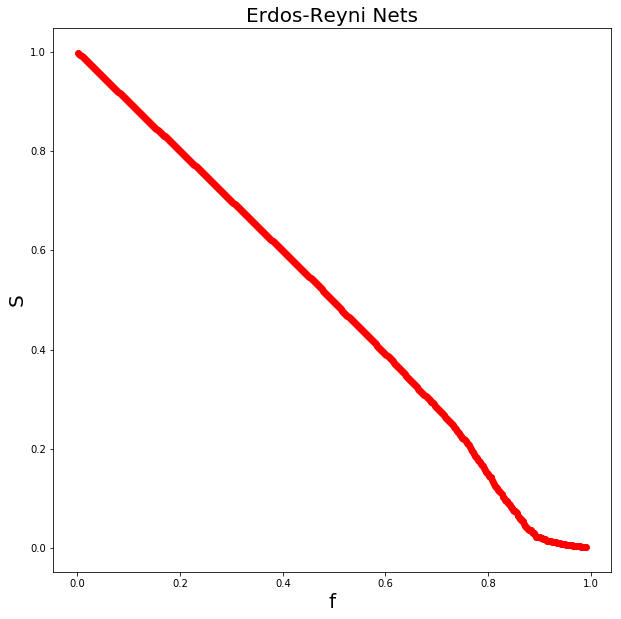

In [411]:
plt.figure(figsize=(10,10))
plt.title('Erdos-Reyni Nets', fontsize=20)
plt.plot(vnf_ER_mean,Sf_ER_mean,'-or', label='Failures')
plt.xlabel("f", fontsize=20)
plt.ylabel("S", fontsize=20)

Let's see for the other networks:

### Failure for Barabási-Albert scale-free networks

In [412]:
N = 500
av_degree = 10
m = int(av_degree/2)
BA_Net = nx.barabasi_albert_graph(N, m)

In [416]:
Sf_BA = [None]*10
vnf_BA = [None]*10

for i in range(len(Sf_BA)):
    Sf_BA[i], vnf_BA[i] = failures(BA_Net)

Sf_BA_mean = [None]*len(Sf_BA[0])
vnf_BA_mean = [None]*len(Sf_BA[0])

AUX1 = np.zeros(10)
AUX2 = np.zeros(10)



A for loop to calculate the mean of 10 networks 

In [417]:
for i in range(len(Sf_BA[0])):
    for j in range(10):
        AUX1[j] = Sf_BA[j][i]
        AUX2[j] = vnf_BA[j][i]
    Sf_BA_mean[i] = st.mean(AUX1)
    vnf_BA_mean[i] = st.mean(AUX2)

A plot

Text(0, 0.5, 'S')

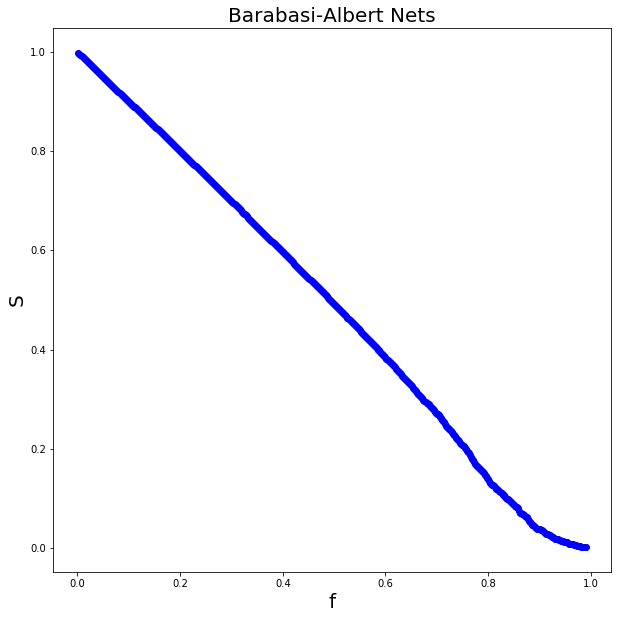

In [418]:
plt.figure(figsize=(10,10))
plt.plot(vnf_BA_mean,Sf_BA_mean,'-ob', label='Failures')
plt.title('Barabasi-Albert Nets', fontsize=20)
plt.xlabel("f", fontsize=20)
plt.ylabel("S", fontsize=20)

### Failures for Small-world networks for $p=0.001$, $p=0.01$ and $p=0.1$

### $p = 0.001$

In [419]:
N = 500
av_degree = 10
k = int(av_degree)
p = 0.001
WS_small1 = nx.watts_strogatz_graph(N, k,p , seed=None)

In [420]:
Sf_WS1 = [None]*10
vnf_WS1 = [None]*10

for i in range(len(Sf_WS1)):
    Sf_WS1[i], vnf_WS1[i] = failures(WS_small1)

Sf_WS1_mean = [None]*len(Sf_WS1[0])
vnf_WS1_mean = [None]*len(Sf_WS1[0])

AUX1 = np.zeros(10)
AUX2 = np.zeros(10)



The mean of 10 networks

In [421]:
for i in range(len(Sf_WS1[0])):
    for j in range(10):
        AUX1[j] = Sf_WS1[j][i]
        AUX2[j] = vnf_WS1[j][i]
    Sf_WS1_mean[i] = st.mean(AUX1)
    vnf_WS1_mean[i] = st.mean(AUX2)

Plot in this case

Text(0, 0.5, 'S')

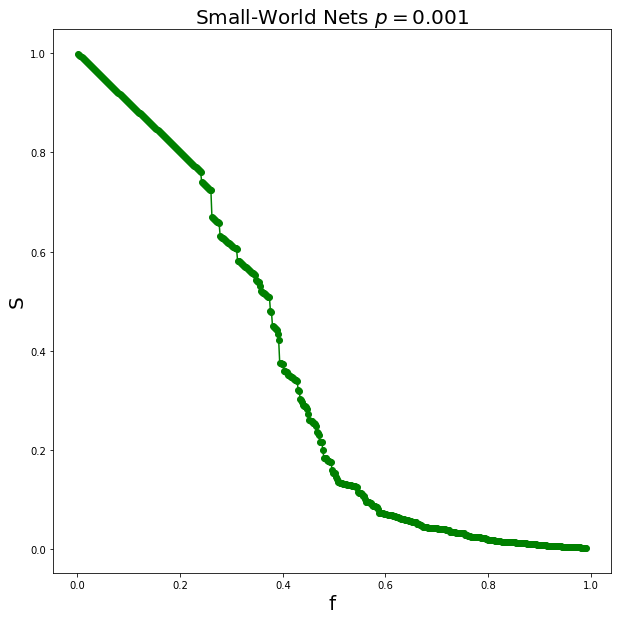

In [423]:
plt.figure(figsize=(10,10))
plt.plot(vnf_WS1_mean,Sf_WS1_mean,'-og', label='Failures')
plt.title('Small-World Nets $p=0.001$', fontsize=20)
plt.xlabel("f", fontsize=20)
plt.ylabel("S", fontsize=20)

### Small-World $p=0.01$

In [445]:
N = 500
av_degree = 10
k = int(av_degree)
p = 0.01

WS_small2 = nx.watts_strogatz_graph(N, k,p , seed=None)

In [446]:
Sf_WS2 = [None]*10
vnf_WS2 = [None]*10

for i in range(len(Sf_WS2)):
    Sf_WS2[i], vnf_WS2[i] = failures(WS_small2)

Sf_WS2_mean = [None]*len(Sf_WS2[0])
vnf_WS2_mean = [None]*len(Sf_WS2[0])

AUX1 = np.zeros(10)
AUX2 = np.zeros(10)

The mean of 10 networks

In [447]:
for i in range(len(Sf_WS2[0])):
    for j in range(10):
        AUX1[j] = Sf_WS2[j][i]
        AUX2[j] = vnf_WS2[j][i]
    Sf_WS2_mean[i] = st.mean(AUX1)
    vnf_WS2_mean[i] = st.mean(AUX2)

Plot in this case

Text(0, 0.5, 'S')

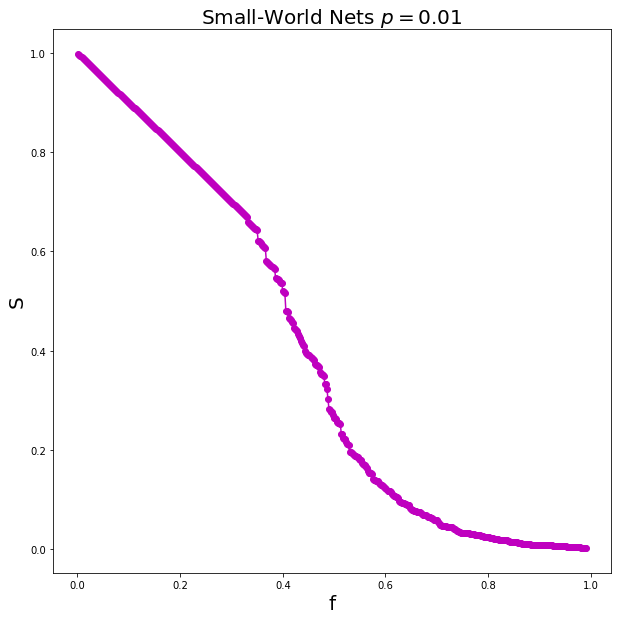

In [448]:
plt.figure(figsize=(10,10))
plt.plot(vnf_WS2_mean,Sf_WS2_mean,'-om', label='Failures')
plt.title('Small-World Nets $p=0.01$', fontsize=20)
plt.xlabel("f", fontsize=20)
plt.ylabel("S", fontsize=20)

### Small-World $p=0.1$

In [430]:
N = 500
av_degree = 10
k = int(av_degree)
p = 0.1

WS_small3 = nx.watts_strogatz_graph(N, k,p , seed=None)

In [431]:
Sf_WS3 = [None]*N
vnf_WS3 = [None]*N

for i in range(len(Sf_WS3)):
    Sf_WS3[i], vnf_WS3[i] = failures(WS_small3)

Sf_WS3_mean = [None]*len(Sf_WS3[0])
vnf_WS3_mean = [None]*len(Sf_WS3[0])

AUX1 = np.zeros(10)
AUX2 = np.zeros(10)

The mean of 10 networks

In [432]:
for i in range(len(Sf_WS3[0])):
    for j in range(10):
        AUX1[j] = Sf_WS3[j][i]
        AUX2[j] = vnf_WS3[j][i]
    Sf_WS3_mean[i] = st.mean(AUX1)
    vnf_WS3_mean[i] = st.mean(AUX2)

Plot in this case

Text(0, 0.5, 'S')

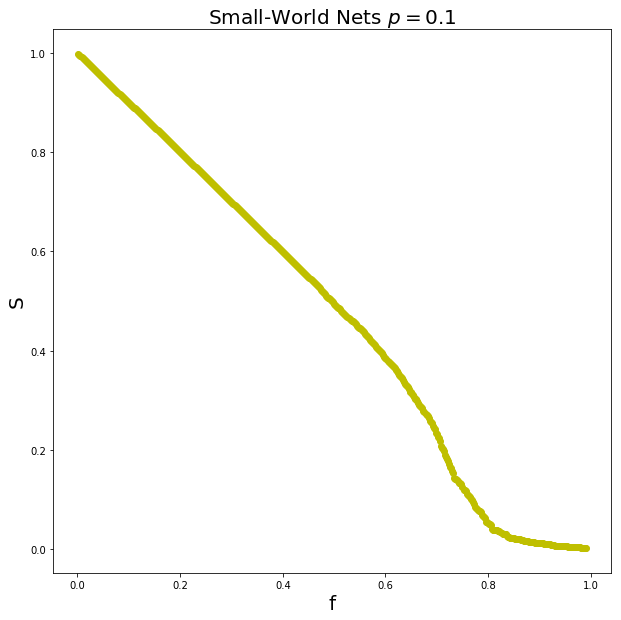

In [433]:
plt.figure(figsize=(10,10))
plt.plot(vnf_WS3_mean,Sf_WS3_mean,'-oy', label='Failures')
plt.title('Small-World Nets $p=0.1$', fontsize=20)
plt.xlabel("f", fontsize=20)
plt.ylabel("S", fontsize=20)

### Which network is the most robust against failures? (Each point must be an average over at least 10 simulations).

For this, let's see a plot for all networks

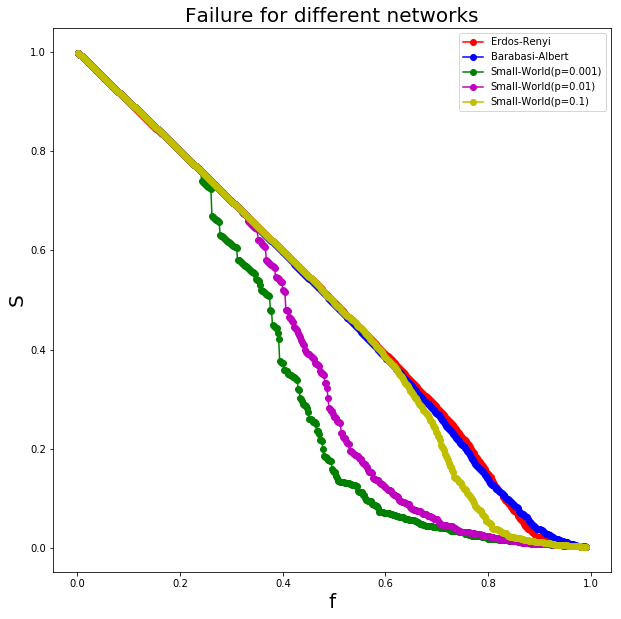

In [449]:
plt.figure(figsize=(10,10))
plt.title('Failure for different networks',fontsize=20)
plt.ylabel('S',fontsize=20)
plt.xlabel('f',fontsize=20)
plt.plot(vnf_ER_mean,Sf_ER_mean,'-or')
plt.plot(vnf_BA_mean,Sf_BA_mean,'-ob')
plt.plot(vnf_WS1_mean,Sf_WS1_mean,'-og')
plt.plot(vnf_WS2_mean,Sf_WS2_mean,'-om')
plt.plot(vnf_WS3_mean,Sf_WS3_mean,'-oy')

plt.legend(('Erdos-Renyi','Barabasi-Albert','Small-World(p=0.001)','Small-World(p=0.01)','Small-World(p=0.1)'), loc='upper right')

The most robust network is the Barabasi-Albert, followed by ER, WS($p=0.1$), WS($p=0.01$),WS($p=0.001$).

## Perform the same analysis as before, but for the case of attacks.

In [82]:
def most_connected(G): # This function is used to find the most connected node
    maxk = 0
    node = 0
    for i in G.nodes():
        if(G.degree(i) >= maxk):
            maxk = G.degree(i)
            node = i
    return node 

def attacks(H):
    G = H.copy()
    from random import choice
    N0 = len(G)
    vn = []
    S = []
    n = 0 #number of nodes removed
    while(len(G.nodes()) > int(0.01*N0)):
        #print('Removing... n = ', n)
        #print(G.nodes)
        node = most_connected(G) #select the most connected node on the largest component            
        #print('selected to removed:', node)
        G.remove_node(node) 
        Gcc=sorted(nx.connected_component_subgraphs(G), key = len, reverse=True)
        Glc=Gcc[0] 
        S.append(len(Glc)/N0) #store the size of the largest component
        n = n + 1
        vn.append(n/N0)
    return S, vn

### ER Networks

In [435]:
S_ER, vn_ER = attacks(ER_Nets)

Text(0, 0.5, 'S')

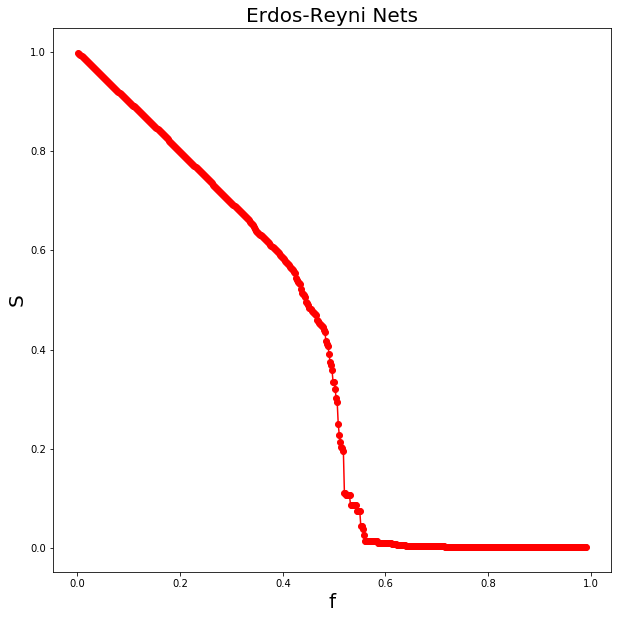

In [436]:
plt.figure(figsize=(10,10))
plt.title('Erdos-Reyni Nets', fontsize=20)
plt.plot(vn_ER,S_ER,'-or', label='Attacks')
plt.xlabel("f", fontsize=20)
plt.ylabel("S", fontsize=20)

### Attacks for Barabási-Albert scale-free networks

Text(0, 0.5, 'S')

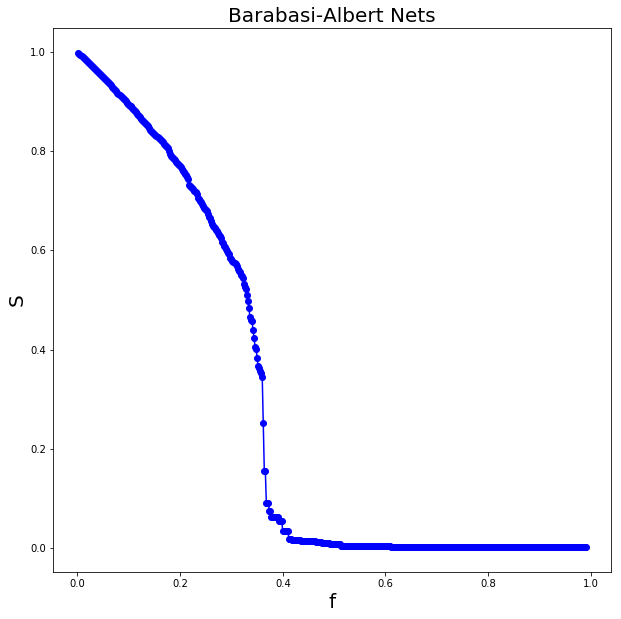

In [439]:
S_BA, vn_BA = attacks(BA_Net)


plt.figure(figsize=(10,10))
plt.plot(vn_BA,S_BA,'-ob')
plt.title('Barabasi-Albert Nets', fontsize=20)
plt.xlabel("f", fontsize=20)
plt.ylabel("S", fontsize=20)

### Attacks for Small-world networks for $p=0.001$, $p=0.01$ and $p=0.1$

### $p = 0.001$

Text(0, 0.5, 'S')

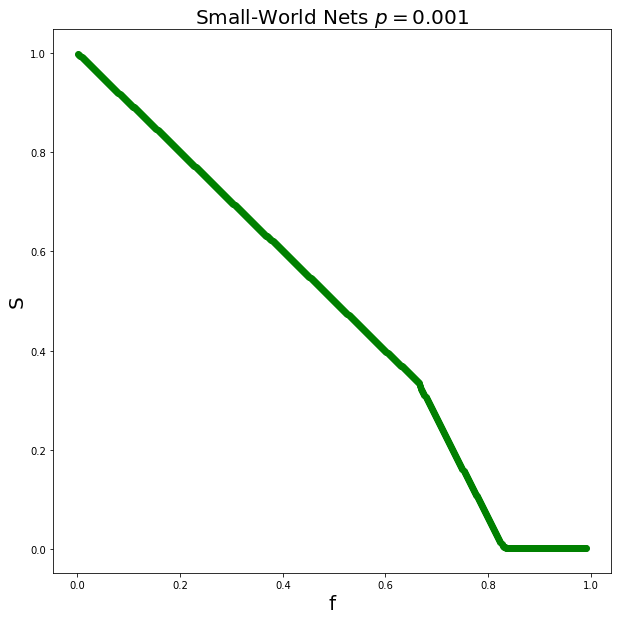

In [441]:

S_WS1, vn_WS1 = attacks(WS_small1)


plt.figure(figsize=(10,10))
plt.plot(vn_WS1,S_WS1,'-og')
plt.title('Small-World Nets $p=0.001$', fontsize=20)
plt.xlabel("f", fontsize=20)
plt.ylabel("S", fontsize=20)

### $p=0.01$

Text(0, 0.5, 'S')

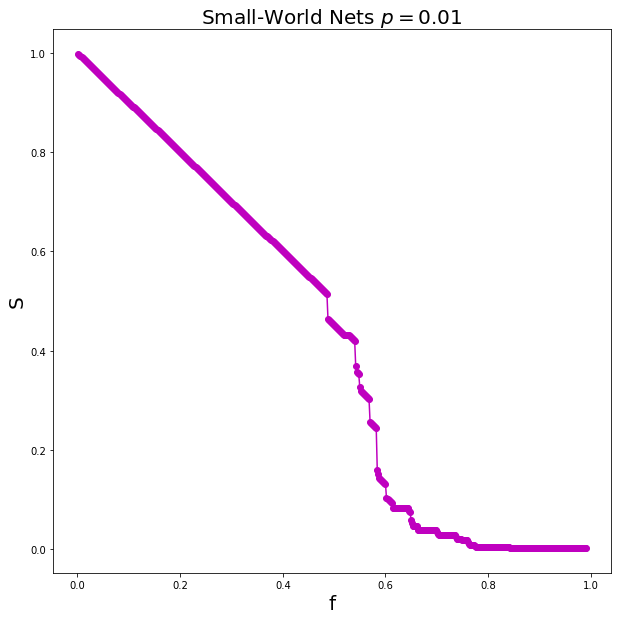

In [450]:
S_WS2, vn_WS2 = attacks(WS_small2)



plt.figure(figsize=(10,10))
plt.plot(vn_WS2,S_WS2,'-om')
plt.title('Small-World Nets $p=0.01$', fontsize=20)
plt.xlabel("f", fontsize=20)
plt.ylabel("S", fontsize=20)

### $p=0.1$

Text(0, 0.5, 'S')

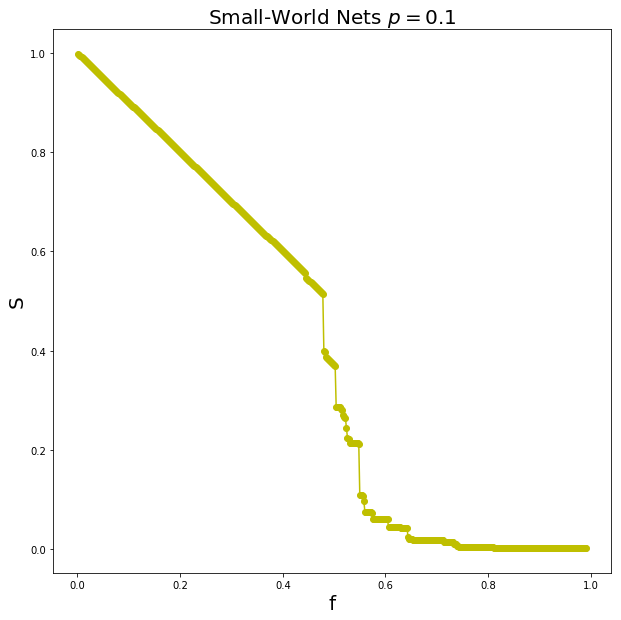

In [443]:

S_WS3, vn_WS3 = attacks(WS_small3)

plt.figure(figsize=(10,10))
plt.plot(vn_WS3,S_WS3,'-oy')
plt.title('Small-World Nets $p=0.1$', fontsize=20)
plt.xlabel("f", fontsize=20)
plt.ylabel("S", fontsize=20)

Attacks for all the networks togheter in a plot:

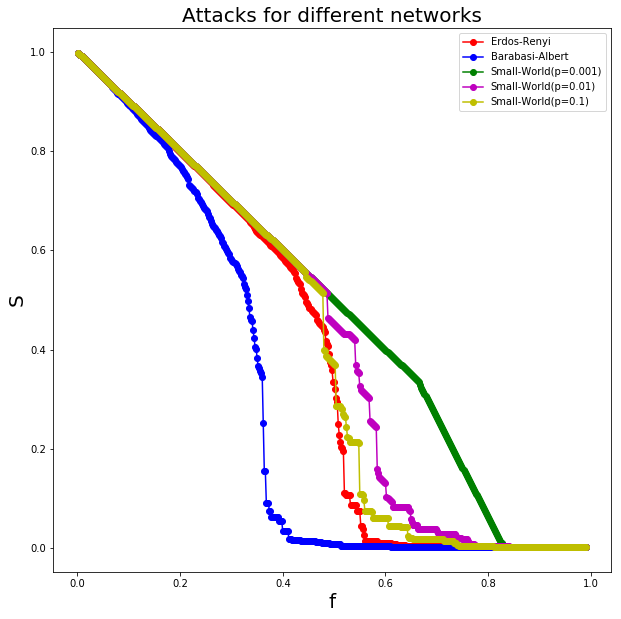

In [451]:
plt.figure(figsize=(10,10))
plt.title('Attacks for different networks',fontsize=20)
plt.ylabel('S',fontsize=20)
plt.xlabel('f',fontsize=20)
plt.plot(vn_ER,S_ER,'-or')
plt.plot(vn_BA,S_BA,'-ob')
plt.plot(vn_WS1,S_WS1,'-og')
plt.plot(vn_WS2,S_WS2,'-om')
plt.plot(vn_WS3,S_WS3,'-oy')

plt.legend(('Erdos-Renyi','Barabasi-Albert','Small-World(p=0.001)','Small-World(p=0.01)','Small-World(p=0.1)'), loc='upper right')

The most robust in the case of attacks is WS($p=0.001$), followed by WS($p=0.01$), WS($p=0.1$), ER and BA.

### Compare the protein networks in terms of failures and attacks. Which species is the most robust? Consider the datasets

**a)** Human protein network (http://konect.cc/networks/maayan-vidal)

**b)** elegans protein network 2007 (http://interactome.dfci.harvard.edu/C_elegans/index.php?page=download)

**c)** Mosquito interaction network (A. aegypti)(https://static-content.springer.com/esm/art%3A10.1186%2F1471-2164-11-380/MediaObjects/12864_2009_2974_MOESM1_ESM.XLS)

### Human protein networks

In [249]:
humanprotein = nx.read_edgelist("out.txt", nodetype=int)
humanprotein = nx.convert_node_labels_to_integers(humanprotein, first_label=0)
Sub=sorted(nx.connected_component_subgraphs(humanprotein), key = len, reverse=True)
humanprotein =Sub[0]
humanprotein = humanprotein.to_undirected()
humanprotein.remove_edges_from(nx.selfloop_edges(humanprotein))

### elegans protein 2007

In [248]:
celegans2007 = nx.read_edgelist("celegans2007.txt")
Sub=sorted(nx.connected_component_subgraphs(celegans2007), key = len, reverse=True)
celegans2007=Sub[0]
celegans2007.remove_edges_from(nx.selfloop_edges(celegans2007))
celegans2007 = nx.convert_node_labels_to_integers(celegans2007, first_label=0)

### Mosquito interaction network (A. aegypti)

In [250]:
mosquito = nx.read_edgelist("mosquito.txt")
Sub = sorted(nx.connected_component_subgraphs(mosquito),key=len, reverse=True)
mosquito = Sub[0]
mosquito.remove_edges_from(nx.selfloop_edges(mosquito))
mosquito = nx.convert_node_labels_to_integers(mosquito,first_label=0)

### Failures in protein networks

In [252]:
SH, vnH = failures(humanprotein)
SE, vnE = failures(celegans2007)
SM, vnM = failures(mosquito)

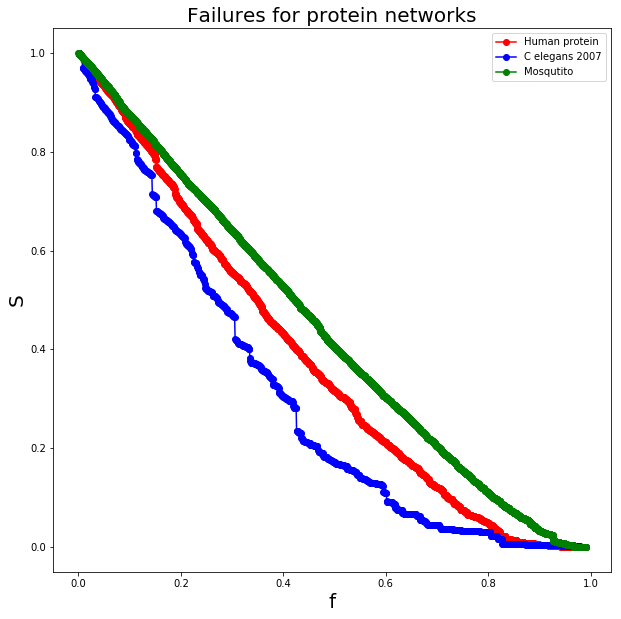

In [253]:
plt.figure(figsize=(10,10))
plt.title('Failures for protein networks',fontsize=20)
plt.ylabel('S',fontsize=20)
plt.xlabel('f',fontsize=20)
plt.plot(vnH,SH,'-or')
plt.plot(vnE,SE,'-ob')
plt.plot(vnM,SM,'-og')


plt.legend(('Human protein','C elegans 2007','Mosqutito'), loc='upper right')

The network mosquito is most robust against failures

### Attacks in protein networks

In [254]:
SHa, vnHa = attacks(humanprotein)
SEa, vnEa = attacks(celegans2007)
SMa, vnMa = attacks(mosquito)

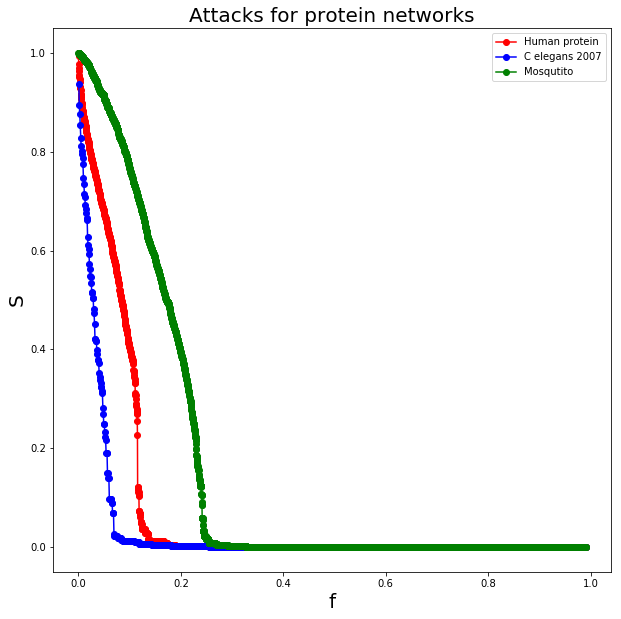

In [255]:
plt.figure(figsize=(10,10))
plt.title('Attacks for protein networks',fontsize=20)
plt.ylabel('S',fontsize=20)
plt.xlabel('f',fontsize=20)
plt.plot(vnHa,SHa,'-or')
plt.plot(vnEa,SEa,'-ob')
plt.plot(vnMa,SMa,'-og')


plt.legend(('Human protein','C elegans 2007','Mosqutito'), loc='upper right')

The network mosquito is most robust against attacks.

### Analysis for networks with Community Structure 

Consider the networks with community structure you generated in the previous project. Verify how community organization influences the resilience of networks. That is, using the model by Santo Fortunato, generate networks with different values of $\mu$ .For these networks construct the graph of the size of the largest component versus the fraction of removed nodes.

In [152]:
from networkx.algorithms.community import LFR_benchmark_graph

In [193]:
mu = [0.035,0.045,0.050, 0.1,0.3,0.5]
Nets_comu = [None]*len(mu)

In [198]:
N = 200
tau1 = 3
tau2 = 1.5
k =16
minc = 50
maxc = 50
for i in range(len(mu)):
    Nets_comu[i] = LFR_benchmark_graph(n = N, tau1 = tau1, tau2 = tau2, mu = mu[i], min_degree = k, 
                        max_degree = k, min_community=minc, max_community = maxc, seed = 10)

Lets see a plot of these networks

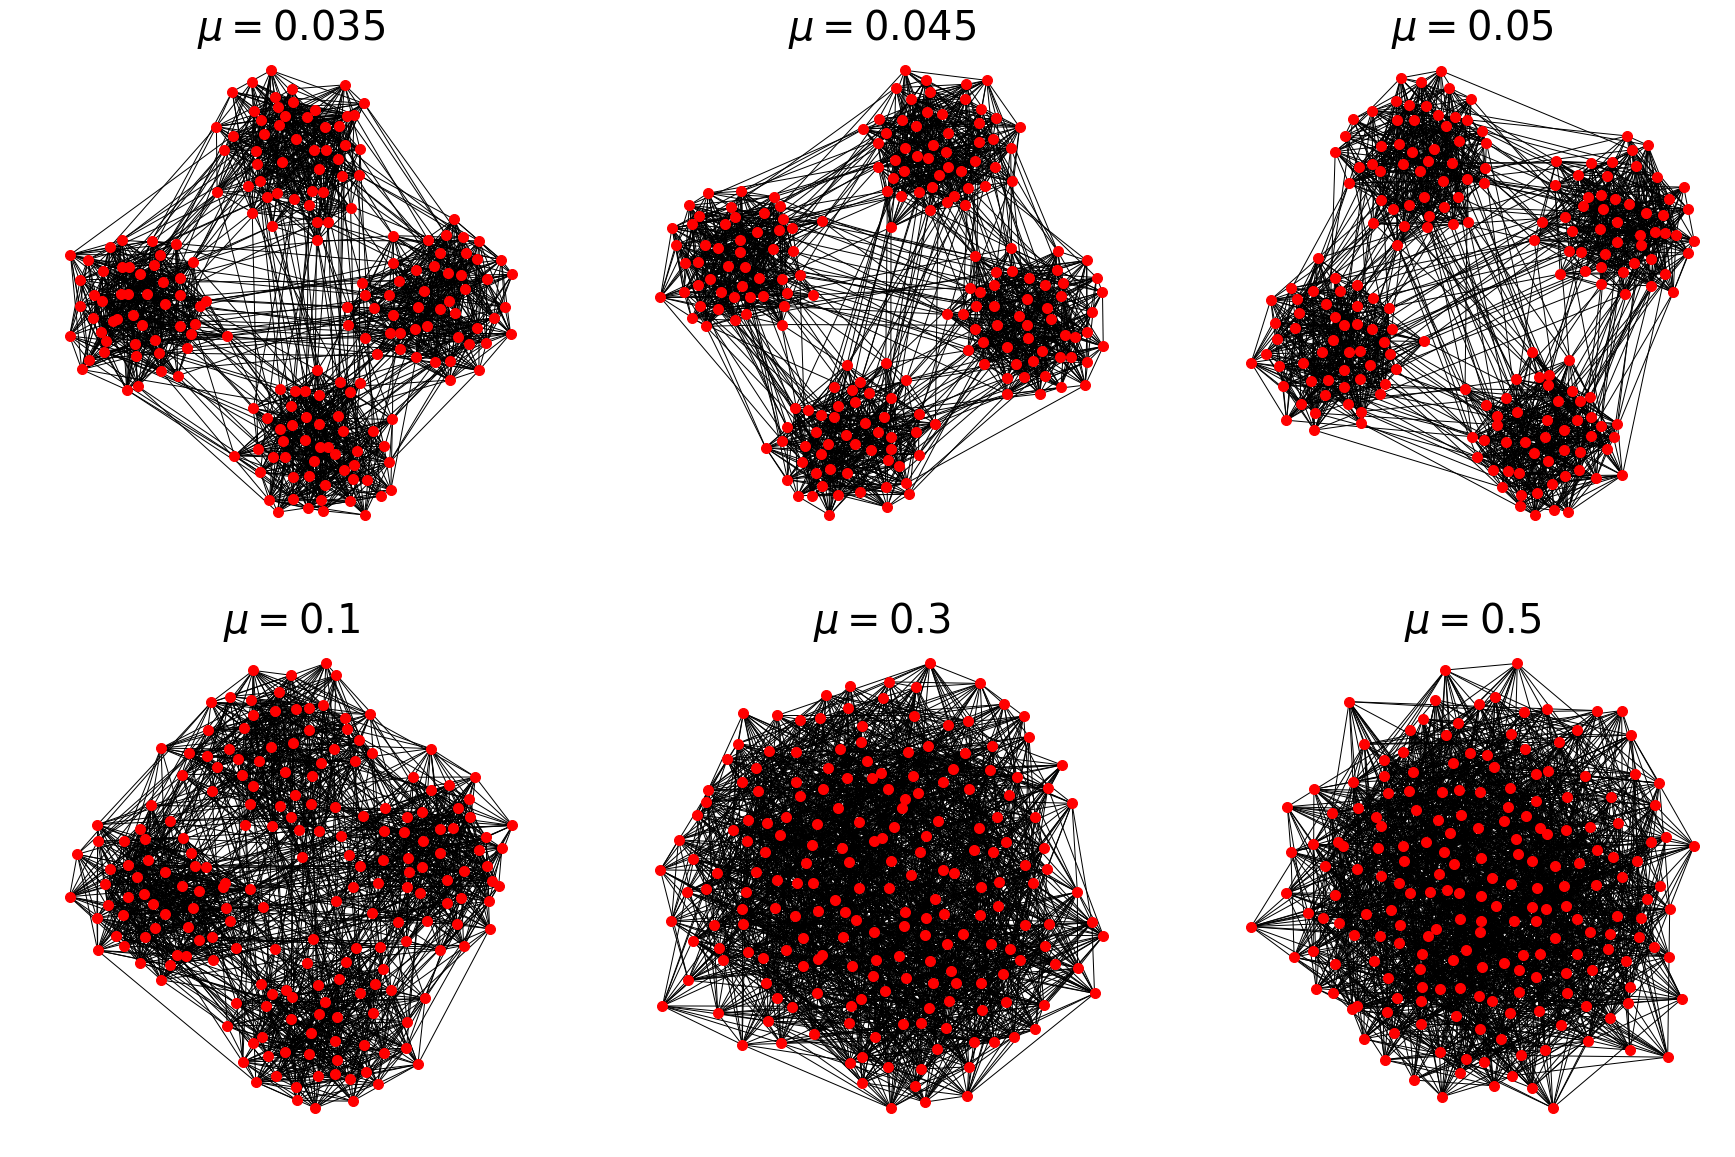

In [199]:
fig, axs = plt.subplots(2, 3,figsize=(30, 20))
ax = axs.flatten()

titles = ['$\mu=0.035$','$\mu=0.045$','$\mu=0.05$','$\mu=0.1$', '$\mu=0.3$', '$\mu=0.5$']

for i in range(len(Nets_comu)):
    pos=nx.spring_layout(Nets_comu[i])
    nx.draw_networkx(Nets_comu[i], with_labels = False, nodecolor='red', edge_color='black', 
        node_size=100, font_size=16,  width=1,pos = pos, ax=ax[i])
    ax[i].set_axis_off()
    ax[i].set_title(titles[i], fontsize=40)

### Failures in theses networks with community structure

In [200]:
Sm1, vnm1 = failures(Nets_comu[0])
Sm2, vnm2 = failures(Nets_comu[1])
Sm3, vnm3 = failures(Nets_comu[2])
Sm4, vnm4 = failures(Nets_comu[3])
Sm5, vnm5 = failures(Nets_comu[4])
Sm6, vnm6 = failures(Nets_comu[5])

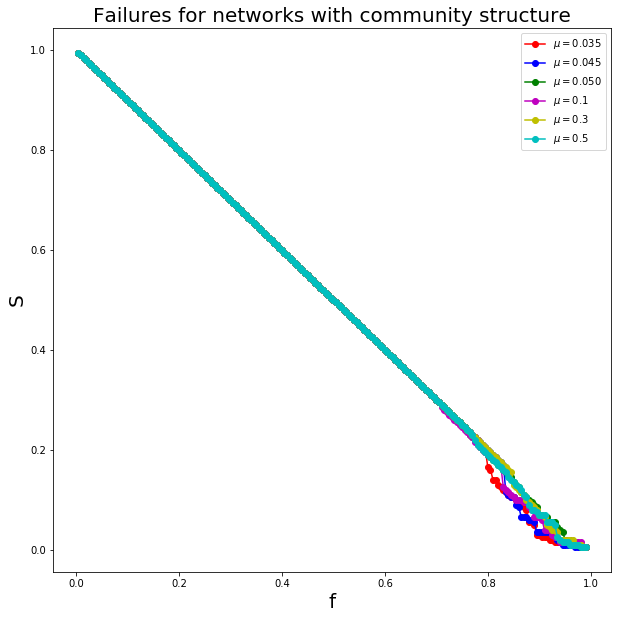

In [201]:
plt.figure(figsize=(10,10))
plt.title('Failures for networks with community structure',fontsize=20)
plt.ylabel('S',fontsize=20)
plt.xlabel('f',fontsize=20)
## plt.yscale('log')
plt.plot(vnm1,Sm1,'-or')
plt.plot(vnm2,Sm2,'-ob')
plt.plot(vnm3,Sm3,'-og')
plt.plot(vnm4,Sm4,'-om')
plt.plot(vnm5,Sm5,'-oy')
plt.plot(vnm6,Sm6,'-oc')


plt.legend(('$\mu=0.035$','$\mu=0.045$','$\mu=0.050$','$\mu=0.1$','$\mu=0.3$', '$\mu=0.5$'), loc='upper right')

In this plot we see no big difference between the networks with different kind of community structure.

### Attacks in theses networks with community structure

In [203]:
Sm11, vnm11 = attacks(Nets_comu[0])
Sm22, vnm22 = attacks(Nets_comu[1])
Sm33, vnm33 = attacks(Nets_comu[2])
Sm44, vnm44 = attacks(Nets_comu[3])
Sm55, vnm55 = attacks(Nets_comu[4])
Sm66, vnm66 = attacks(Nets_comu[5])


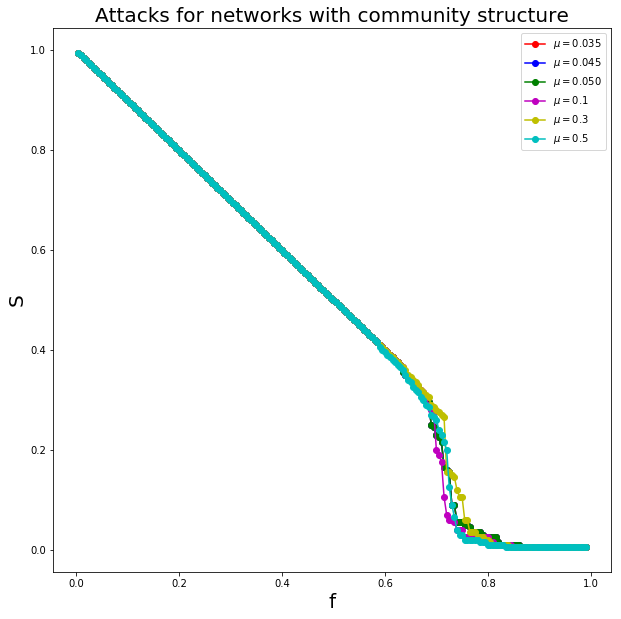

In [204]:
plt.figure(figsize=(10,10))
plt.title('Attacks for networks with community structure',fontsize=20)
plt.ylabel('S',fontsize=20)
plt.xlabel('f',fontsize=20)
plt.plot(vnm11,Sm11,'-or')
plt.plot(vnm22,Sm22,'-ob')
plt.plot(vnm33,Sm33,'-og')
plt.plot(vnm44,Sm44,'-om')
plt.plot(vnm55,Sm55,'-oy')
plt.plot(vnm66,Sm66,'-oc')

plt.legend(('$\mu=0.035$','$\mu=0.045$','$\mu=0.050$','$\mu=0.1$','$\mu=0.3$', '$\mu=0.5$'), loc='upper right')

The same thing happens here, no big difference.

## Bonus: 
Implement the model of complex networks with assortativity by Xulvi-Brunet-Sokolov (https://en.wikipedia.org/wiki/Xulvi-Brunet–Sokolov_algorithm). Verify how the assortativity influences the network resilience against failures and attacks. That is, construct the plots of the size of the largest component in terms of the fraction of removed nodes for assortativity values: -0.2, 0 and 0.2.

### Algorithm Description

- Starting from a given network

- At each step two links of the network are chosen at random, so that the four nodes, in general, with different degrees, connected through the links two by two are considered.

- The four nodes are ordered with respect to their degrees.

- Then with probability $p$, the links are rewired in a such a way that one link connects the two nodes with the larger degrees, otherwise the links are randomly rewired (In this way, the result is an assortative network). If the user want a dissortative network the only difference is the node with the bigger degree is connected to the node with the lower degree.

- In the case when one, or both, of these new links already existed in the network, the step is discarded and a new pair of edges is selected. This restriction prevents the appearance of multiple edges connecting the same pair of nodes.

- Note that the algorithm does not change the degree of nodes involved and thus the overall degree distribution in the network.

- Changing the parameter $p$ it is possible to construct networks with different degree of assortativity.

Here we will construct a function to transform a given network to another with the desired assortativity, based on Xulvi-Brunet-Sokolov algorithm

In [6]:
import random
import operator
import pdb

In [228]:
def xulvi_brunet_sokolov(Grafo,assor):
    tol = 0.01
    G = Grafo.copy()
    ##Grafo = nx.freeze(Grafo)
    net_assor = nx.degree_assortativity_coefficient(G)
    
    ## pdb.set_trace()
    
    while(np.abs(net_assor - assor)>tol):
        
        edge1 = random.choice([i for i in G.edges()]) ## Choosing one edge
        edge2 = random.choice([j for j in G.edges()]) ## Choosing another edge
        if(edge1 == edge2): ## Verifying if is not the same
            continue
            
        ## Saving the labels of the nodes        
        node1 = edge1[0]
        node2 = edge1[1]
        node3 = edge2[0]
        node4 = edge2[1]
        
        
        grau1 = G.degree[node1]
        grau2 = G.degree[node2]
        grau3 = G.degree[node3]
        grau4 = G.degree[node4]
        
        ## Verifying if we have 4 nodes
        if(node1==node3 or node1 == node4 or node2 == node3 or node2 == node4):
            continue
            
        # Function to sort the list by first item of tuple 
        def Sort_Tuple(tup):  
            # reverse = None (Sorts in Ascending order)  
            # key is set to sort using first element of  
            # sublist lambda has been used  
            return(sorted(tup, key = lambda x: x[0]))   
  
        
        
        nodes_degree = [[grau1,node1],[grau2,node2],[grau3,node3],[grau4,node4]] ##saving a list for each node degree 
        nodes_degree_sort = Sort_Tuple(nodes_degree) ## Sorting nodes based on the degree
        
        
        G.remove_edge(node1,node2) ## Removing the edge
        G.remove_edge(node3,node4) ## Removing the edge
        
        
        def rewire_assor(G,nodes_degree_sort): ## function to rewire edges 
            G.add_edge(nodes_degree_sort[2][1],nodes_degree_sort[3][1])
            G.add_edge(nodes_degree_sort[0][1], nodes_degree_sort[1][1])
            return(G)
        
        
        def rewire_dissor(G,nodes_degree_sort): ## function to rewire edges 
            G.add_edge(nodes_degree_sort[3][1],nodes_degree_sort[0][1])
            G.add_edge(nodes_degree_sort[2][1], nodes_degree_sort[1][1])
            
            return(G)
            
        if(assor>0 and (net_assor<assor)):
            if(G.has_edge(nodes_degree_sort[2][1],nodes_degree_sort[3][1])):
                continue
            if(G.has_edge(nodes_degree_sort[0][1], nodes_degree_sort[1][1])):
                continue
                
            rewire_assor(G,nodes_degree_sort)
        
        if(assor>0 and net_assor>assor):
            if(G.has_edge(nodes_degree_sort[3][1],nodes_degree_sort[0][1])):
                continue
            if(G.has_edge(nodes_degree_sort[2][1], nodes_degree_sort[1][1])):
                continue
            rewire_dissor(G,nodes_degree_sort)

        
        if(assor<0 and (net_assor>assor)):
            if(G.has_edge(nodes_degree_sort[3][1],nodes_degree_sort[0][1])):
                continue
            if(G.has_edge(nodes_degree_sort[2][1], nodes_degree_sort[1][1])):
                continue
            rewire_dissor(G,nodes_degree_sort)
            
        
        if(assor<0 and (net_assor<assor)):
            if(G.has_edge(nodes_degree_sort[2][1],nodes_degree_sort[3][1])):
                continue
            if(G.has_edge(nodes_degree_sort[0][1], nodes_degree_sort[1][1])):
                continue
            rewire_assor(G,nodes_degree_sort)
        
        if(assor==0):
            if(net_assor>0):
                if(G.has_edge(nodes_degree_sort[2][1],nodes_degree_sort[3][1])):
                    continue
                if(G.has_edge(nodes_degree_sort[0][1], nodes_degree_sort[1][1])):
                    continue
                    
                rewire_dissor(G,nodes_degree_sort)
               
            if(net_assor<0):
                if(G.has_edge(nodes_degree_sort[3][1],nodes_degree_sort[0][1])):
                    continue
                if(G.has_edge(nodes_degree_sort[2][1], nodes_degree_sort[1][1])):
                    continue
                rewire_assor(G,nodes_degree_sort)
                          
        net_assor = nx.degree_assortativity_coefficient(G) ## Atual assortativity
                          
    return(G)

### Let us construct networks with assortativity and verify how assortativity influences in attacks and failures

### Erdos-Reyni Network

Let us construct a ER network and modify the assortatity with the Xulxi-Brunet-Sokolov algorithm

In [213]:
N = 500
av_degree = 8
m = int(av_degree/2)
p = av_degree/(N-1)


G_ER = nx.gnp_random_graph(N, p, seed=None, directed=False)

What is the assortativity of this network?

In [214]:
print(nx.degree_assortativity_coefficient(G_ER))

-0.014929648562974318


### Now, lets modify this network to get different assortativities with the algorithm Xulxi-Brunet-Sokolov

In [230]:
G_ASSOR =  xulvi_brunet_sokolov(G_ER,0.2)
G_DISSOR = xulvi_brunet_sokolov(G_ER,-0.2)
G_neutral = xulvi_brunet_sokolov(G_ER,0)

In [231]:
print('The assortativity of G_ASSOR IS:', nx.degree_assortativity_coefficient(G_ASSOR))
print('The assortativity of G_DISSOR IS:', nx.degree_assortativity_coefficient(G_DISSOR))
print('The assortativity of G_neutral IS:', nx.degree_assortativity_coefficient(G_neutral))

The assortativity of G_ASSOR IS: 0.1900820507092018
The assortativity of G_DISSOR IS: -0.19016436955901686
The assortativity of G_neutral IS: -0.009020218744252103


### Failures in networks with different assortativities values

In [232]:
Sa, vna = failures(G_ASSOR)
Sd, vnd = failures(G_DISSOR)
Sn, vnn = failures(G_neutral)

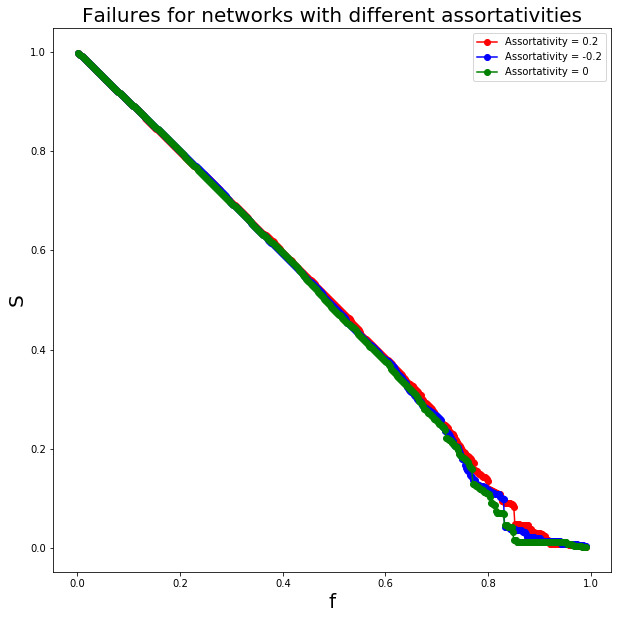

In [233]:
plt.figure(figsize=(10,10))
plt.title('Failures for networks with different assortativities',fontsize=20)
plt.ylabel('S',fontsize=20)
plt.xlabel('f',fontsize=20)
plt.plot(vna,Sa,'-or')
plt.plot(vnd,Sd,'-ob')
plt.plot(vnn,Sn,'-og')


plt.legend(('Assortativity = 0.2','Assortativity = -0.2','Assortativity = 0'), loc='upper right')

In this case, the most robust  is the network with $assortativity=0.2$, followed by the network with $0$ asssortativity and the dissortative network.

### Attacks in networks with different assortativities values

In [234]:
Saa, vnaa = attacks(G_ASSOR)
Sda, vnda = attacks(G_DISSOR)
Sna, vnna = attacks(G_neutral)

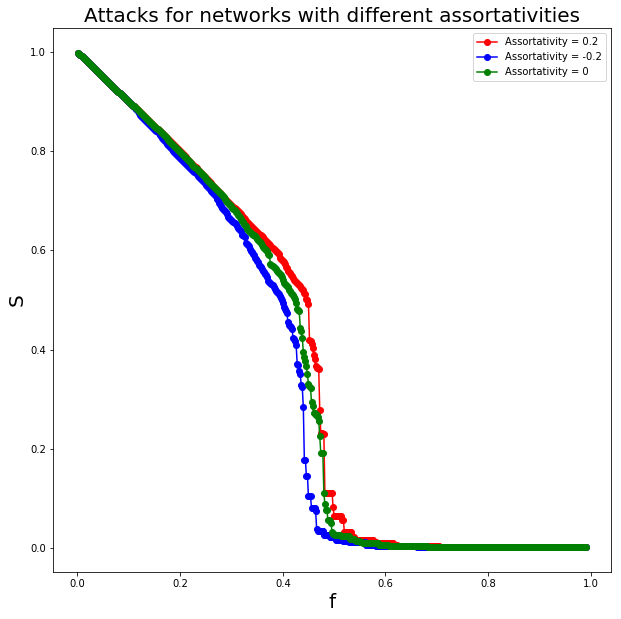

In [235]:
plt.figure(figsize=(10,10))
plt.title('Attacks for networks with different assortativities',fontsize=20)
plt.ylabel('S',fontsize=20)
plt.xlabel('f',fontsize=20)
plt.plot(vnaa,Saa,'-or')
plt.plot(vnda,Sda,'-ob')
plt.plot(vnna,Sna,'-og')


plt.legend(('Assortativity = 0.2','Assortativity = -0.2','Assortativity = 0'), loc='upper right')

In this case, the most robust networks is the network with assortativity positive, followed by the network with uncorrelated and the dissortative.

## Question 2 

### Epidemic spreading
- Compare the epidemic spreading in networks by simulating the reactive case in Erdös-Rényi networks, Barabási-Albert scale-free networks, and small-world networks for $p=0.001$, $p=0.01$ and $p=0.1$. $N = 500$ e $\langle k \rangle= 8$ . Construct the curves of the fraction of infected nodes (SIS model) versus $\lambda = \frac{\beta}{\mu}$, where $\mu = 1$.

- Consider the same analysis for the SIR epidemic model

### Introduction to epidemic spreading

The prediction of disease evolution and social contagion processes, can be conceptualized with a variety of mathematical models of spreading and diffusion processes. These models evolved from simple compartimental approaches into structure frameworks Ref [2]. The simplest class of epidemic models assumes that the population can be divided into different classes or compartments depending on the stage of the disease. Let's talk about SIS model!

### SIS model

The evolution equation for the SIS model on a network with arbitrary degree distribution can be written by, using the heterogeneus mean-field approach:

$$ \frac{d i_k(t)}{dt} = -\mu i_k(t) + \beta k (1 - i_k(t))\Theta_k(t)$$ 

Where $i_k(t)$ is the fraction of infetected nodes with degree $k$ at time $t$, $\beta$ is the spreading rate and $\mu$ is the recovery rate and $\Theta_k$ is the density of infected neighbors of vertices of degree $k$. With some mathematics is possible to get the epidemic threshold:

$$\lambda_c = \frac{\langle k \rangle}{\langle k \rangle^2}$$


### The curve of the fraction of infected nodes in the SIS model versus $\lambda$

In [5]:
N = 500 ##Number of nodes
av_degree = 8 ##av degree

First defining the functions for SIS simulation

In [286]:
def find(v, i): # function to find the positions of an element in a vector
    l = []
    pos = 0
    for x in v:
        if(x == i):
            l.append(pos)
        pos = pos + 1
    return l

In [287]:
def momment_of_degree_distribution(G,m):
    M = 0
    N = len(G)
    for i in G.nodes():
        M = M + G.degree(i)**m
    M = M/N
    return M

In [288]:
def SIS(G, mu=1, Tmax = 20):    
    def find(v, i): # function to find the positions of an element in a vector
        l = []
        pos = 0
        for x in v:
            if(x == i):
                l.append(pos)
            pos = pos + 1
        return l

    vlbda = list()
    rhoI = list() # vector that stores the fraction of infected nodes according to the parameter lambda
    for lbd in arange(0,1, 0.05):
        beta = lbd*mu
        #Reactive process: SIS dynamics
        Tmax = 20 #maximum number of steps
        av_rho = np.zeros(Tmax)
        for seed_node in G.nodes():
            vector_states = np.zeros(N) # vector that stores the states of the vertices
            vector_states[seed_node] = 1 # vector that stores the states
            ninfected = 1
            infected = list() # Stores the number of infected nodes at each time step
            vrho = list()
            # Reactive model
            for t in arange(0, Tmax): # Simulate until a maximum number of steps Tmax
                infected = find(vector_states,1) # list of infected nodes
                for i in infected: # try to infect the neighbors
                    neigs = G.neighbors(i)
                    for j in neigs:
                        if np.random.rand() < beta:
                            vector_states[j] = 1
                for k in infected: # try to recover the infected nodes
                    if np.random.rand() < mu:
                        vector_states[k] = 0
                ninfected = len(find(vector_states,1))
                vrho.append(ninfected/N)
            for x in arange(0, len(vrho)):
                av_rho[x] = av_rho[x] + vrho[x]
        av_rho = av_rho/len(G.nodes())
        rhoI.append(mean(av_rho[arange(int(0.8*Tmax), Tmax)]))
        vlbda.append(lbd)
    return vlbda, rhoI

### Erdos-Reyni networks

Let us create an ER network to perform the simulation

In [333]:
ER_sim = nx.gnp_random_graph(N, av_degree/N, seed=None, directed=False)

Let us perform 30 simulations and use the mean of the fraction of infected nodes

In [334]:
lambdas = [None]*30
rhoIs = [None]*30

In [335]:
for i in range(30):
    lambdas[i], rhoIs[i] = SIS(ER_sim)

Creating a function for calculate the mean of simulations

In [336]:
def mean_sim(vec1,vec2):
    vec1_mean = [None]*len(vec1[0])
    vec2_mean = [None]*len(vec2[0])
    aux1 = np.zeros(len(vec1))
    aux2= np.zeros(len(vec2))
    
    for i in range(len(vec1[0])):
        for j in range(len(vec1)):
            aux1[j]=vec1[j][i]
            aux2[j]=vec2[j][i]
        vec1_mean[i] = st.mean(aux1)
        vec2_mean[i] = st.mean(aux2)
    return vec1_mean, vec2_mean

In [337]:
lambdasmean, rhoIsmean = mean_sim(lambdas,rhoIs)

In [338]:
lambda_c = momment_of_degree_distribution2(ER_sim,1)/momment_of_degree_distribution2(ER_sim,2)

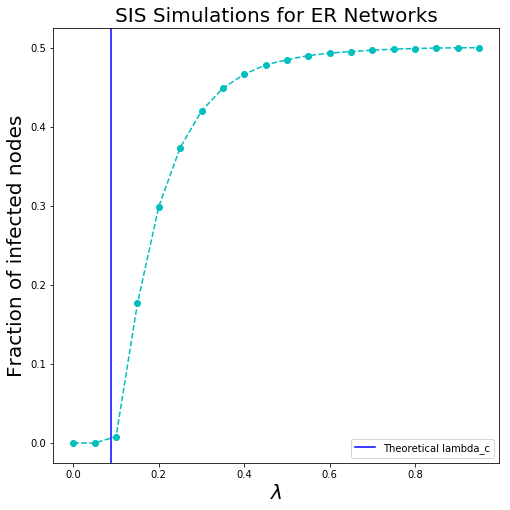

In [339]:
plt.figure(figsize=(8,8))
plt.title('SIS Simulations for ER Networks', fontsize=20)
plt.ylabel('Fraction of infected nodes', fontsize=20)
plt.xlabel('$\lambda$', fontsize=20)
plt.plot(lambdasmean,rhoIsmean,'co--')
plt.axvline(lambda_c, color = 'b', label='Theoretical lambda_c')
plt.legend()

### Barabasi Albert networks

In [290]:
m = int(av_degree/2)
BA_sim = nx.barabasi_albert_graph(N, m)

In [291]:
lambdas1 = [None]*30
rhoIs1 = [None]*30

Let us perform 10 simulations and use the mean of the fraction of infected nodes

In [292]:
for i in range(30):
    lambdas1[i], rhoIs1[i] = SIS(BA_sim)

In [293]:
lambdas1mean, rhoIs1mean = mean_sim(lambdas1,rhoIs1)

In [294]:
lambda_c1 = momment_of_degree_distribution2(BA_sim,1)/momment_of_degree_distribution2(BA_sim,2)

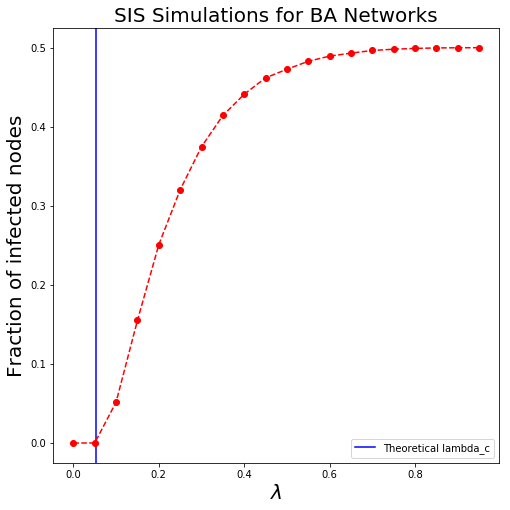

In [330]:
plt.figure(figsize=(8,8))
plt.title('SIS Simulations for BA Networks', fontsize=20)
plt.ylabel('Fraction of infected nodes', fontsize=20)
plt.xlabel('$\lambda$', fontsize=20)
plt.axvline(lambda_c1, color = 'b', label='Theoretical lambda_c')
plt.plot(lambdas1mean,rhoIs1mean,'ro--')
plt.legend()

### Small-World networks $p=0.001$

In [296]:
k = int(av_degree)
p = 0.001
WS_sim1 = nx.watts_strogatz_graph(N, k,p , seed=None)

In [297]:
lambdas2 = [None]*30
rhoIs2 = [None]*30

In [298]:
for i in range(30):
    lambdas2[i], rhoIs2[i] = SIS(WS_sim1)

In [299]:
lambdas2mean, rhoIs2mean = mean_sim(lambdas2,rhoIs2)

In [300]:
lambda_c3 = momment_of_degree_distribution2(WS_sim1,1)/momment_of_degree_distribution2(WS_sim1,2)

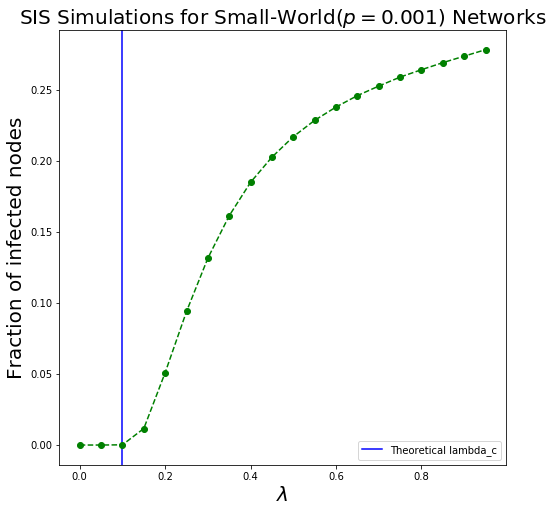

In [329]:
plt.figure(figsize=(8,8))
plt.title('SIS Simulations for Small-World($p=0.001$) Networks', fontsize=20)
plt.ylabel('Fraction of infected nodes', fontsize=20)
plt.xlabel('$\lambda$', fontsize=20)
plt.axvline(lambda_c3, color = 'b', label='Theoretical lambda_c')
plt.plot(lambdas2mean,rhoIs2mean,'go--')
plt.legend()

### Small-World networks $p=0.01$

In [301]:
k = int(av_degree)
p = 0.01
WS_sim2 = nx.watts_strogatz_graph(N, k,p , seed=None)

In [302]:
lambdas3 = [None]*30
rhoIs3 = [None]*30

In [303]:
for i in range(30):
    lambdas3[i], rhoIs3[i] = SIS(WS_sim2)

In [304]:
lambdas3mean, rhoIs3mean = mean_sim(lambdas3,rhoIs3)

In [315]:
lambda_c4 = momment_of_degree_distribution2(WS_sim2,1)/momment_of_degree_distribution2(WS_sim2,2)

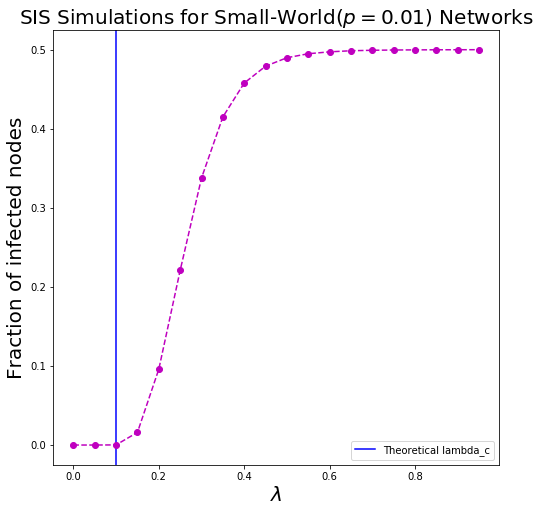

In [328]:
plt.figure(figsize=(8,8))
plt.title('SIS Simulations for Small-World($p=0.01$) Networks', fontsize=20)
plt.ylabel('Fraction of infected nodes', fontsize=20)
plt.xlabel('$\lambda$', fontsize=20)
plt.axvline(lambda_c4, color = 'b', label='Theoretical lambda_c')
plt.plot(lambdas3mean,rhoIs3mean,'mo--')
plt.legend()

### Small-World networks $p=0.1$

In [305]:
k = int(av_degree)
p = 0.1
WS_sim3 = nx.watts_strogatz_graph(N, k,p , seed=None)

In [306]:
lambdas4 = [None]*30
rhoIs4 = [None]*30

In [307]:
for i in range(30):
    lambdas4[i], rhoIs4[i] = SIS(WS_sim3)

In [308]:
lambdas4mean, rhoIs4mean = mean_sim(lambdas4,rhoIs4)

In [317]:
lambda_c5 = momment_of_degree_distribution2(WS_sim3,1)/momment_of_degree_distribution2(WS_sim3,2)

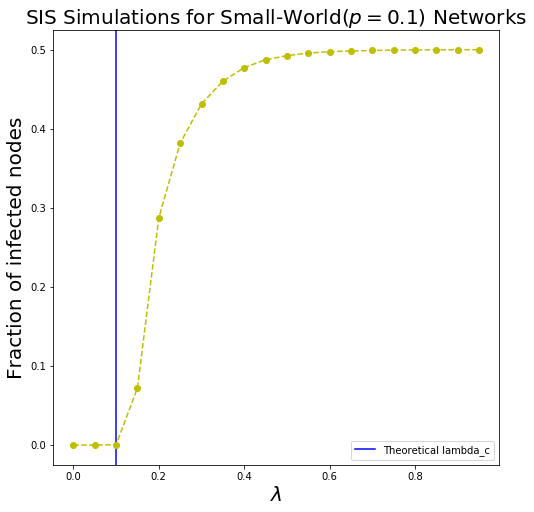

In [326]:
plt.figure(figsize=(8,8))
plt.title('SIS Simulations for Small-World($p=0.1$) Networks', fontsize=20)
plt.ylabel('Fraction of infected nodes', fontsize=20)
plt.xlabel('$\lambda$', fontsize=20)
plt.axvline(lambda_c5, color = 'b', label='Theoretical lambda_c')
plt.plot(lambdas4mean,rhoIs4mean,'yo--')
plt.legend()

### Consider the same analysis for the SIR epidemic model

### The SIR model

In the case of the SIR model, the number of infected individuals is ultimately zero and the epidemics die because of the depletion of the susceptible individuals that after the infection move into the removed compartment Ref [1].

A possible approach to describe the evolution of SIR model is given by the following equations:

$$ \frac{d i_k(t)}{dt} = -\mu i_k(t) + \beta k s_k(t)\Theta_k(t)$$

$$ \frac{d s_k(t)}{dt} = -\beta k s_k(t)\Theta_k(t)$$

$$ \frac{d r_k(t)}{dt} = \mu i_k(t)$$

Where $i_k(t)$, $s_k(t)$ and $r_k(t)$ are the infected nodes, suscetible, recovered with degree $k$ in time $t$ respectively.
Again with some mathematics is possible to get the epidemic threshold for this model:

$$\lambda_c = \frac{\langle k \rangle}{\langle k^2 \rangle - \langle k \rangle}$$

In [311]:
def SIR(G,mu=1,Tmax=20):
    def find(v, i): # function to find the positions of an element in a vector
        l = []
        pos = 0
        for x in v:
            if(x == i):
                l.append(pos)
            pos = pos + 1
        return l

    vlbda = list()
    rhoI = list() # vector that stores the fraction of infected nodes according to the parameter lambda
    for lbd in arange(0,1, 0.05):
        beta = lbd*mu
        #Reactive process: SIR dynamics
        Tmax = 20 #maximum number of steps
        av_rho = np.zeros(Tmax)
        for seed_node in G.nodes():
            vector_states = np.zeros(N) # vector that stores the states of the vertices
            vector_states[seed_node] = 1 # vector that stores the states
            ninfected = 1
            infected = list() # Stores the number of infected nodes at each time step
            vrho = list()
            # Reactive model
            for t in arange(0,Tmax): # Simulate until a maximum number of steps
                infected = find(vector_states,1) # list of infected nodes
                for i in infected: # try to infect the neighbors
                    neigs = G.neighbors(i)
                    for j in neigs:
                        if np.random.rand() < beta:
                            if(vector_states[j] != 2): # verify if the node is not recovered
                                vector_states[j] = 1
                for k in infected: # try to recover the infected nodes
                    if np.random.rand() < mu:
                        vector_states[k] = 2
                ninfected = len(find(vector_states,1))
                vrho.append(ninfected/N)
            for x in arange(0, len(vrho)):
                av_rho[x] = av_rho[x] + vrho[x]
                
        av_rho = av_rho/len(G.nodes())
        rhoI.append(max(av_rho))
        vlbda.append(lbd)
    return vlbda, rhoI

### Erdos-Reyni networks

In [322]:
lambdas_sir = [None]*30
rhoIs_sir = [None]*30

In [323]:
for i in range(30):
    lambdas_sir[i], rhoIs_sir[i] = SIR(ER_sim)

In [324]:
lambdasmean_sir, rhoIsmean_sir = mean_sim(lambdas_sir,rhoIs_sir)

In [325]:
lambda_cs1 = momment_of_degree_distribution2(ER_sim,1)/(momment_of_degree_distribution2(ER_sim,2)-momment_of_degree_distribution2(ER_sim,1))

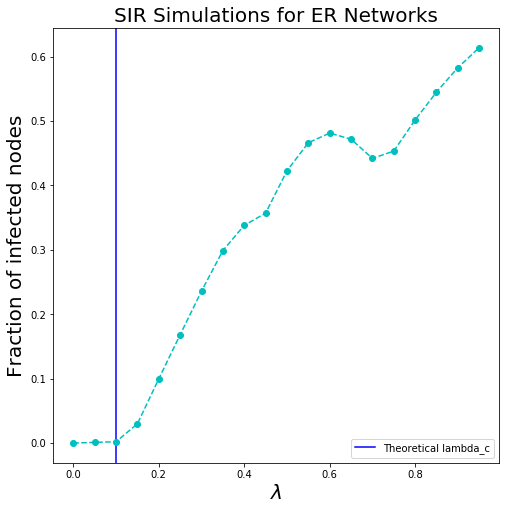

In [360]:
plt.figure(figsize=(8,8))
plt.title('SIR Simulations for ER Networks', fontsize=20)
plt.ylabel('Fraction of infected nodes', fontsize=20)
plt.xlabel('$\lambda$', fontsize=20)
plt.axvline(lambda_cs1, color = 'b', label='Theoretical lambda_c')
plt.plot(lambdasmean_sir,rhoIsmean_sir,'co--')
plt.legend()

### Barabasi Albert Networks

In [340]:
lambdas_sir1 = [None]*30
rhoIs_sir1 = [None]*30

In [341]:
for i in range(30):
    lambdas_sir1[i], rhoIs_sir1[i] = SIR(BA_sim)

In [342]:
lambdasmean_sir1, rhoIsmean_sir1 = mean_sim(lambdas_sir1,rhoIs_sir1)

In [352]:
lambda_cs2 = momment_of_degree_distribution2(BA_sim,1)/(momment_of_degree_distribution2(BA_sim,2)-momment_of_degree_distribution2(BA_sim,1))

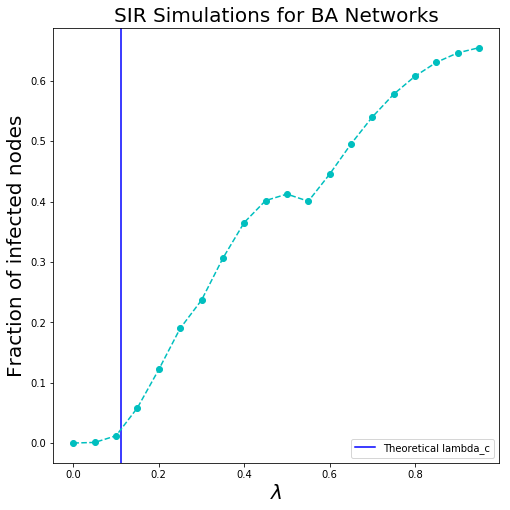

In [359]:
plt.figure(figsize=(8,8))
plt.title('SIR Simulations for BA Networks', fontsize=20)
plt.ylabel('Fraction of infected nodes', fontsize=20)
plt.xlabel('$\lambda$', fontsize=20)
plt.axvline(lambda_cs2, color = 'b', label='Theoretical lambda_c')
plt.plot(lambdasmean_sir1,rhoIsmean_sir1,'co--')
plt.legend()

### WS Networks $p=0.001$

In [343]:
lambdas_sir2 = [None]*30
rhoIs_sir2 = [None]*30

In [344]:
for i in range(30):
    lambdas_sir2[i],rhoIs_sir2[i]= SIR(WS_sim1)

In [345]:
lambdasmean_sir2, rhoIsmean_sir2 = mean_sim(lambdas_sir2,rhoIs_sir2)

In [356]:
lambda_cs3 = momment_of_degree_distribution2(WS_sim1,1)/(momment_of_degree_distribution2(WS_sim1,2)-momment_of_degree_distribution2(WS_sim1,1))

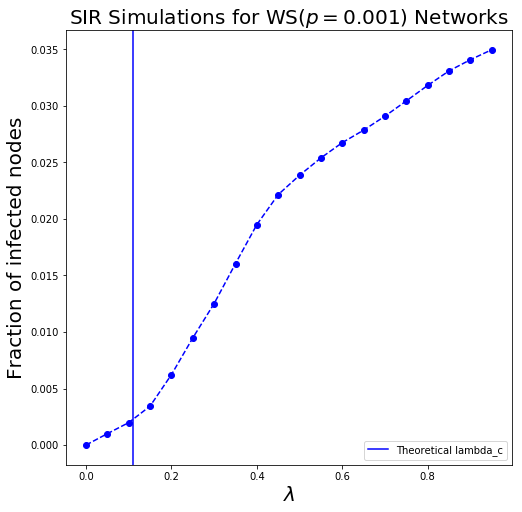

In [358]:
plt.figure(figsize=(8,8))
plt.title('SIR Simulations for WS($p=0.001$) Networks', fontsize=20)
plt.ylabel('Fraction of infected nodes', fontsize=20)
plt.xlabel('$\lambda$', fontsize=20)
plt.axvline(lambda_cs3, color = 'b', label='Theoretical lambda_c')
plt.plot(lambdasmean_sir2,rhoIsmean_sir2,'bo--')
plt.legend()

### WS Networks $p=0.01$

In [346]:
lambdas_sir3 = [None]*30
rhoIs_sir3 = [None]*30


In [347]:
for i in range(30):
    lambdas_sir3[i],rhoIs_sir3[i]=SIR(WS_sim2)

In [348]:
lambdasmean_sir3, rhoIsmean_sir3 = mean_sim(lambdas_sir3,rhoIs_sir3)

In [361]:
lambda_cs4 = momment_of_degree_distribution2(WS_sim2,1)/(momment_of_degree_distribution2(WS_sim2,2)-momment_of_degree_distribution2(WS_sim2,1))

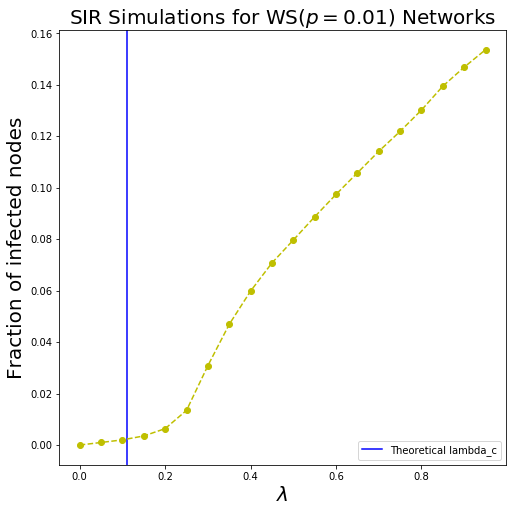

In [362]:
plt.figure(figsize=(8,8))
plt.title('SIR Simulations for WS($p=0.01$) Networks', fontsize=20)
plt.ylabel('Fraction of infected nodes', fontsize=20)
plt.xlabel('$\lambda$', fontsize=20)
plt.axvline(lambda_cs4, color = 'b', label='Theoretical lambda_c')
plt.plot(lambdasmean_sir3,rhoIsmean_sir3,'yo--')
plt.legend()

### WS Networks $p=0.1$

In [349]:
lambdas_sir4 = [None]*30
rhoIs_sir4 = [None]*30

In [350]:
for i in range(30):
    lambdas_sir4[i],rhoIs_sir4[i] = SIR(WS_sim3)

In [351]:
lambdasmean_sir4, rhoIsmean_sir4 = mean_sim(lambdas_sir4,rhoIs_sir4)

In [363]:
lambda_cs5 = momment_of_degree_distribution2(WS_sim3,1)/(momment_of_degree_distribution2(WS_sim3,2)-momment_of_degree_distribution2(WS_sim3,1))

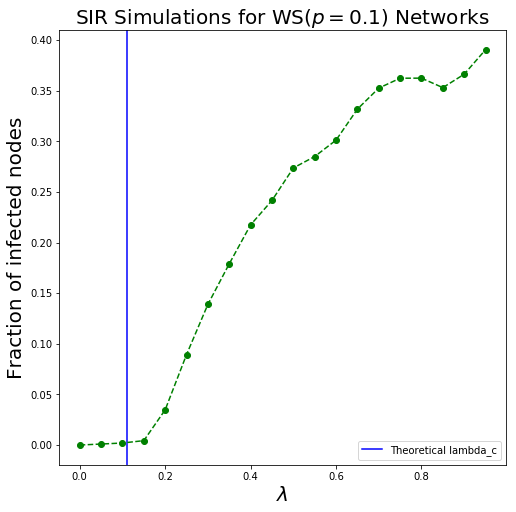

In [364]:
plt.figure(figsize=(8,8))
plt.title('SIR Simulations for WS($p=0.1$) Networks', fontsize=20)
plt.ylabel('Fraction of infected nodes', fontsize=20)
plt.xlabel('$\lambda$', fontsize=20)
plt.axvline(lambda_cs5, color = 'b', label='Theoretical lambda_c')
plt.plot(lambdasmean_sir4,rhoIsmean_sir4,'go--')
plt.legend()

**Considerations:** In the case SIR simulation the peak is very instable, even doing every point an average of 30 simulations the plots are not so soft

## Question 3

Influential spreaders

For the following networks:

•Hamsterster friendships•(http://konect.uni-koblenz.de/networks/petster-friendships-hamster)

•C. elegans neural network•(http://www-personal.umich.edu/~mejn/netdata/celegansneural.zip)

•US airport network (http://toreopsahl.com/datasets/#usairports)

•Construct the plot of the fraction of removed nodes (in the SIR dynamics) versus a centrality measure (degree, betweenness centrality, closeness centrality, eigenvector centrality, accessibility, k-core and communicability centrality). Verify which of these measures most influence the fraction of removed nodes.

Let us modify the created function to save the fraction of removed nodes in the SIR dynamics

In [370]:
def SIR_numrecover(G,mu=1):
    def find(v, i): # function to find the positions of an element in a vector
        l = []
        pos = 0
        for x in v:
            if(x == i):
                l.append(pos)
            pos = pos + 1
        return l
    
    N = len(G.nodes())
    beta=0.02*mu
    recovered_guys = np.zeros(N)
    
    for seed_node in G.nodes():
        vector_states = np.zeros(N)# vector that stores the states of the vertices
        vector_states[seed_node] = 1 # vector that stores the state
        ninfected = 1
        infected = list() # Stores the number of infected nodes at each time step
     
        
        while ninfected > 0: #Simulate until have an infected guy
            infected = find(vector_states,1) # list of infected nodes
            for i in infected: # try to infect the neighbors
                neigs = G.neighbors(i)
                for j in neigs:
                    if np.random.rand() < beta:
                        if(vector_states[j] != 2): # verify if the node is not recovered
                            vector_states[j] = 1
            for k in infected: # try to recover the infected nodes
                if np.random.rand() < mu:
                    vector_states[k] = 2
            ninfected = len(find(vector_states,1))
        recovered_guys[seed_node] = len(find(vector_states,2))
          
    return recovered_guys

Two functions here: one function to calculate the acessbility and one to the communicability centrality

In [371]:
from scipy.linalg import expm
def acc(G):
    N = len(G.nodes())
    vk = dict(G.degree())
    vk = list(vk.values())
    A = nx.adjacency_matrix(G)
    P = np.zeros((N,N), dtype = 'float')
    for i in np.arange(0, N):
        for j in np.arange(0, N):
            if(vk[i] > 0):
                P[i,j] = A[i,j]/vk[i]
    P2 = expm(P)/np.exp(1)
    vacc = np.zeros(N, dtype = float)
    for i in np.arange(0, N):
        acc = 0
        for j in np.arange(0,N):
            if(P2[i,j] > 0):
                acc = acc + P2[i,j]*log(P2[i,j])
        acc = np.exp(-acc)
        vacc[i] = acc
    return vacc

In [372]:
def communicability_centrality(G):
    G = tornar_naodirecionada(G)
    adj = nx.adjacency_matrix(G).todense().A
    EE = expm(adj)
    vector = np.zeros(len(G.nodes()))
    for i in range(0,len(G.nodes())):
        vector[i] = EE[i,i]
    return(vector)

### Hamsterster friendship

In [394]:
hamster = nx.read_edgelist("out.petster-friendships-hamster-uniq.txt", nodetype=int)
Sub=sorted(nx.connected_component_subgraphs(hamster), key = len, reverse=True)
hamster=Sub[0]
hamster = nx.convert_node_labels_to_integers(hamster, first_label=0)
hamster = hamster.to_undirected()

Using the created function to simulated the infection started in every different node

In [395]:
recover_hamster = SIR_numrecover(hamster,mu=1)

Calculating the fraction

In [396]:
fraction_hamster = recover_hamster/len(hamster.nodes())

Calculating the centrality measures for this network

In [397]:
degree_hamster = dict(hamster.degree())
degree_hamster = list(degree_hamster.values())


BC_hamster = dict(nx.betweenness_centrality(hamster))
BC_hamster = list(BC_hamster.values())

CCL_hamster = dict(nx.closeness_centrality(hamster))
CCL_hamster = list(CCL_hamster.values())

EC_hamster = dict(nx.eigenvector_centrality(hamster))
EC_hamster = list(EC_hamster.values())

ACC_hamster = acc(hamster)

KC_hamster = dict(nx.core_number(hamster))
KC_hamster = list(KC_hamster.values())

CC_hamster = communicability_centrality(hamster)

PR_hamster = dict(nx.pagerank(hamster, alpha=0.85))
PR_hamster = list(PR_hamster.values())

Now let's see a plot of every measure and the fraction of removed nodes

Text(0.5, 1.0, 'PR')

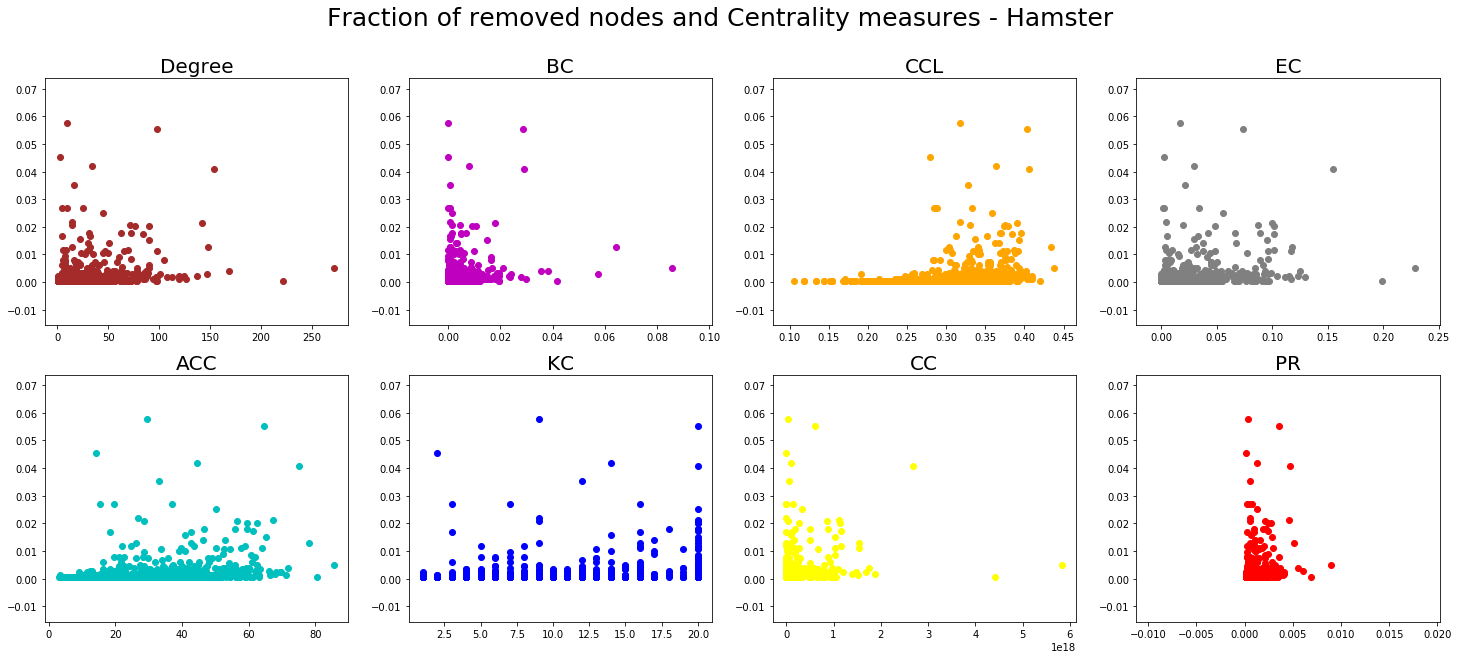

In [398]:
fig, axs = plt.subplots(2, 4,figsize=(25, 10))
fig.suptitle('Fraction of removed nodes and Centrality measures - Hamster', fontsize=25)

axs[0,0].scatter(degree_hamster,fraction_hamster, color="brown")
axs[0,0].set_title('Degree', fontsize=20)


axs[0,1].scatter(BC_hamster,fraction_hamster,color="m")
axs[0,1].set_title('BC', fontsize=20)

axs[0,2].scatter(CCL_hamster,fraction_hamster,color="orange")
axs[0,2].set_title('CCL', fontsize=20)

axs[0,3].scatter(EC_hamster,fraction_hamster,color="gray")
axs[0,3].set_title('EC', fontsize=20)

axs[1,0].scatter(ACC_hamster,fraction_hamster,color="c")
axs[1,0].set_title('ACC', fontsize=20)

axs[1,1].scatter(KC_hamster,fraction_hamster,color="blue")
axs[1,1].set_title('KC', fontsize=20)

axs[1,2].scatter(CC_hamster,fraction_hamster,color="yellow")
axs[1,2].set_title('CC', fontsize=20)

axs[1,3].scatter(PR_hamster,fraction_hamster,color="red")
axs[1,3].set_title('PR', fontsize=20)

In [399]:
print("Pearson correlation between fraction of removed nodes and degree:", stats.pearsonr(fraction_hamster, degree_hamster)[0])
print("Pearson correlation between fraction of removed nodes and BC:", stats.pearsonr(fraction_hamster, BC_hamster)[0])
print("Pearson correlation between fraction of removed nodes and CCL:", stats.pearsonr(fraction_hamster, CCL_hamster)[0])
print("Pearson correlation between fraction of removed nodes and EC:", stats.pearsonr(fraction_hamster, EC_hamster)[0])
print("Pearson correlation between fraction of removed nodes and ACC:", stats.pearsonr(fraction_hamster, ACC_hamster)[0])
print("Pearson correlation between fraction of removed nodes and KC:", stats.pearsonr(fraction_hamster, KC_hamster)[0])
print("Pearson correlation between fraction of removed nodes and CC:", stats.pearsonr(fraction_hamster, CC_hamster)[0])
print("Pearson correlation between fraction of removed nodes and PR:", stats.pearsonr(fraction_hamster, PR_hamster)[0])

Pearson correlation between fraction of removed nodes and degree: 0.3031669222899546
Pearson correlation between fraction of removed nodes and BC: 0.238830012382317
Pearson correlation between fraction of removed nodes and CCL: 0.23805038539609102
Pearson correlation between fraction of removed nodes and EC: 0.31715996915099043
Pearson correlation between fraction of removed nodes and ACC: 0.2899635387187747
Pearson correlation between fraction of removed nodes and KC: 0.2519695848417197
Pearson correlation between fraction of removed nodes and CC: 0.25833789530781265
Pearson correlation between fraction of removed nodes and PR: 0.2858985339643017


In Hamster network the degree,EC, PR influences more in the fraction of removed nodes.


### C elegans neural network

Let's read the network

In [366]:
neuralnet = nx.read_gml('celegansneural.gml')

In [367]:
def tornar_naodirecionada(G):
    matrix = nx.to_numpy_matrix(G)
    A = matrix + np.transpose(matrix)
    N = len(G.nodes())
    for i in range(N):
        for j in range(N):
            if (A[i,j] == 0):
                A[i,j]=0
            else: 
                A[i,j]=1
    
    Grafo = nx.from_numpy_matrix(A)
    return Grafo

In [368]:
Sub=sorted(nx.connected_component_subgraphs(neuralnet), key = len, reverse=True)
neuralnet=Sub[0]
neuralnet = nx.convert_node_labels_to_integers(neuralnet, first_label=0)
neuralnet = tornar_naodirecionada(neuralnet)

Using the created function to simulated the infection started in every different node

In [373]:
recover_neuralnet = SIR_numrecover(neuralnet,mu=1)

Calculating the fraction

In [374]:
fraction_neuralnet = recover_neuralnet/len(neuralnet.nodes())

Calculating the centrality measures for this network

In [377]:
degree_neuralnet = dict(neuralnet.degree())
degree_neuralnet = list(degree_neuralnet.values())


BC_neural = dict(nx.betweenness_centrality(neuralnet))
BC_neural = list(BC_neural.values())

CCL_neural = dict(nx.closeness_centrality(neuralnet))
CCL_neural = list(CCL_neural.values())

EC_neural = dict(nx.eigenvector_centrality(neuralnet))
EC_neural = list(EC_neural.values())

ACC_neural = acc(neuralnet)

KC_neural = dict(nx.core_number(neuralnet))
KC_neural = list(KC_neural.values())

CC_neural = communicability_centrality(neuralnet)

PR_neural = dict(nx.pagerank(neuralnet, alpha=0.85))
PR_neural = list(PR_neural.values())

Now let's see a plot of every measure and the fraction of removed nodes

Text(0.5, 1.0, 'PR')

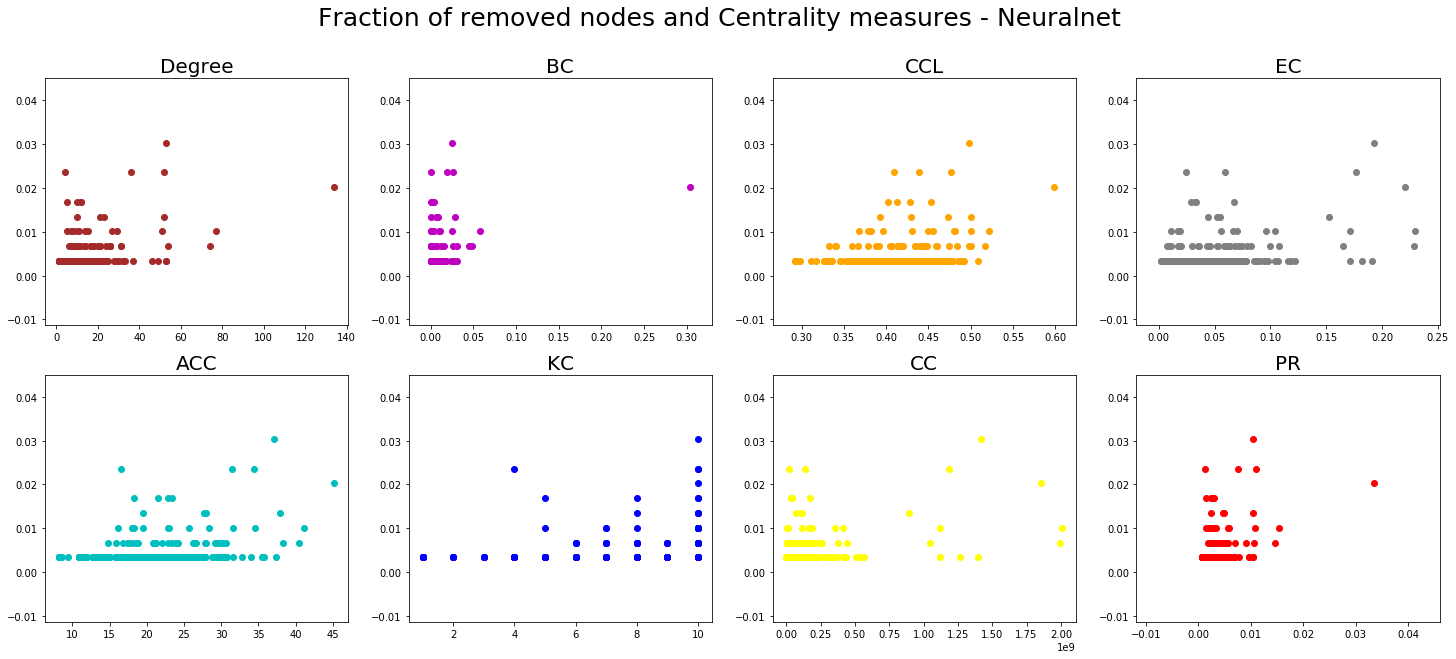

In [378]:
fig, axs = plt.subplots(2, 4,figsize=(25, 10))
fig.suptitle('Fraction of removed nodes and Centrality measures - Neuralnet', fontsize=25)

axs[0,0].scatter(degree_neuralnet,fraction_neuralnet, color="brown")
axs[0,0].set_title('Degree', fontsize=20)


axs[0,1].scatter(BC_neural,fraction_neuralnet,color="m")
axs[0,1].set_title('BC', fontsize=20)

axs[0,2].scatter(CCL_neural,fraction_neuralnet,color="orange")
axs[0,2].set_title('CCL', fontsize=20)

axs[0,3].scatter(EC_neural,fraction_neuralnet,color="gray")
axs[0,3].set_title('EC', fontsize=20)

axs[1,0].scatter(ACC_neural,fraction_neuralnet,color="c")
axs[1,0].set_title('ACC', fontsize=20)

axs[1,1].scatter(KC_neural,fraction_neuralnet,color="blue")
axs[1,1].set_title('KC', fontsize=20)

axs[1,2].scatter(CC_neural,fraction_neuralnet,color="yellow")
axs[1,2].set_title('CC', fontsize=20)

axs[1,3].scatter(PR_neural,fraction_neuralnet,color="red")
axs[1,3].set_title('PR', fontsize=20)

In [382]:
from scipy import stats

In [385]:
print("Pearson correlation between fraction of removed nodes and degree:", stats.pearsonr(fraction_neuralnet, degree_neuralnet)[0])
print("Pearson correlation between fraction of removed nodes and BC:", stats.pearsonr(fraction_neuralnet, BC_neural)[0])
print("Pearson correlation between fraction of removed nodes and CCL:", stats.pearsonr(fraction_neuralnet, CCL_neural)[0])
print("Pearson correlation between fraction of removed nodes and EC:", stats.pearsonr(fraction_neuralnet, EC_neural)[0])
print("Pearson correlation between fraction of removed nodes and ACC:", stats.pearsonr(fraction_neuralnet, ACC_neural)[0])
print("Pearson correlation between fraction of removed nodes and KC:", stats.pearsonr(fraction_neuralnet, KC_neural)[0])
print("Pearson correlation between fraction of removed nodes and CC:", stats.pearsonr(fraction_neuralnet, CC_neural)[0])
print("Pearson correlation between fraction of removed nodes and PR:", stats.pearsonr(fraction_neuralnet, PR_neural)[0])

Pearson correlation between fraction of removed nodes and degree: 0.40088174745360533
Pearson correlation between fraction of removed nodes and BC: 0.349754904381894
Pearson correlation between fraction of removed nodes and CCL: 0.2674651566542371
Pearson correlation between fraction of removed nodes and EC: 0.36283978195778255
Pearson correlation between fraction of removed nodes and ACC: 0.31003246768963133
Pearson correlation between fraction of removed nodes and KC: 0.1252693512852277
Pearson correlation between fraction of removed nodes and CC: 0.3956971109986034
Pearson correlation between fraction of removed nodes and PR: 0.402586354243893


In Neuralnet the Degreee, Betweeness centrality, Comunicability centrality, and Page Rank influences more in the fraction of removed nodes.


### US airport network

In [386]:
usair = nx.read_weighted_edgelist('us_air.txt')
Sub=sorted(nx.connected_component_subgraphs(usair), key = len, reverse=True)
usair=Sub[0]
usair = nx.convert_node_labels_to_integers(usair, first_label=0)
usair = usair.to_undirected()
usair = tornar_naodirecionada(usair)

In [387]:
removed_usair = SIR_numrecover(usair, mu=1)

Calculating the fraction

In [388]:
fraction_usair = removed_usair/len(usair.nodes())

Calculating the centrality measures for this network

In [389]:
degree_usair = dict(usair.degree())
degree_usair = list(degree_usair.values())


BC_usair = dict(nx.betweenness_centrality(usair))
BC_usair = list(BC_usair.values())

CCL_usair = dict(nx.closeness_centrality(usair))
CCL_usair = list(CCL_usair.values())

EC_usair = dict(nx.eigenvector_centrality(usair))
EC_usair = list(EC_usair.values())

ACC_usair = acc(usair)

KC_usair = dict(nx.core_number(usair))
KC_usair = list(KC_usair.values())

CC_usair = communicability_centrality(usair)

PR_usair = dict(nx.pagerank(usair, alpha=0.85))
PR_usair = list(PR_usair.values())

Now let's see a plot of every measure and the fraction of removed nodes

Text(0.5, 1.0, 'PR')

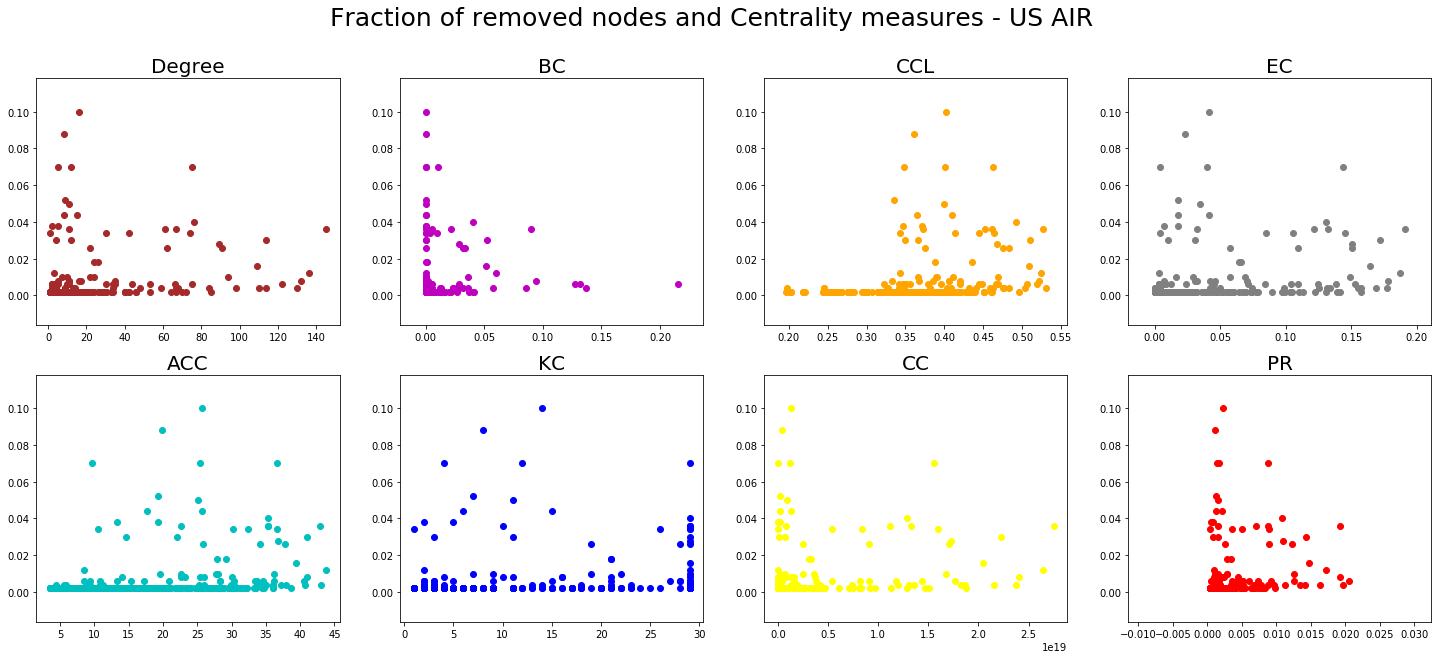

In [390]:
fig, axs = plt.subplots(2, 4,figsize=(25, 10))
fig.suptitle('Fraction of removed nodes and Centrality measures - US AIR', fontsize=25)

axs[0,0].scatter(degree_usair,fraction_usair, color="brown")
axs[0,0].set_title('Degree', fontsize=20)


axs[0,1].scatter(BC_usair,fraction_usair,color="m")
axs[0,1].set_title('BC', fontsize=20)

axs[0,2].scatter(CCL_usair,fraction_usair,color="orange")
axs[0,2].set_title('CCL', fontsize=20)

axs[0,3].scatter(EC_usair,fraction_usair,color="gray")
axs[0,3].set_title('EC', fontsize=20)

axs[1,0].scatter(ACC_usair,fraction_usair,color="c")
axs[1,0].set_title('ACC', fontsize=20)

axs[1,1].scatter(KC_usair,fraction_usair,color="blue")
axs[1,1].set_title('KC', fontsize=20)

axs[1,2].scatter(CC_usair,fraction_usair,color="yellow")
axs[1,2].set_title('CC', fontsize=20)

axs[1,3].scatter(PR_usair,fraction_usair,color="red")
axs[1,3].set_title('PR', fontsize=20)

In [393]:
print("Pearson correlation between fraction of removed nodes and degree:", stats.pearsonr(fraction_usair, degree_usair)[0])
print("Pearson correlation between fraction of removed nodes and BC:", stats.pearsonr(fraction_usair, BC_usair)[0])
print("Pearson correlation between fraction of removed nodes and CCL:", stats.pearsonr(fraction_usair, CCL_usair)[0])
print("Pearson correlation between fraction of removed nodes and EC:", stats.pearsonr(fraction_usair, EC_usair)[0])
print("Pearson correlation between fraction of removed nodes and ACC:", stats.pearsonr(fraction_usair, ACC_usair)[0])
print("Pearson correlation between fraction of removed nodes and KC:", stats.pearsonr(fraction_usair, KC_usair)[0])
print("Pearson correlation between fraction of removed nodes and CC:", stats.pearsonr(fraction_usair, CC_usair)[0])
print("Pearson correlation between fraction of removed nodes and PR:", stats.pearsonr(fraction_usair, PR_usair)[0])

Pearson correlation between fraction of removed nodes and degree: 0.2723183054527847
Pearson correlation between fraction of removed nodes and BC: 0.11436684256007842
Pearson correlation between fraction of removed nodes and CCL: 0.2841017854719447
Pearson correlation between fraction of removed nodes and EC: 0.301035163404418
Pearson correlation between fraction of removed nodes and ACC: 0.30927364290601594
Pearson correlation between fraction of removed nodes and KC: 0.289826512421146
Pearson correlation between fraction of removed nodes and CC: 0.27057791582530655
Pearson correlation between fraction of removed nodes and PR: 0.24158302181050834


In US AIR network the degree, CC, EC, ACC, KC  influences more in the fraction of removed nodes.


## Bonus

Implement the model of complex	networks	with	assortativity	by Xulvi-Brunet-Sokolov(https://en.wikipedia.org/wiki/Xulvi-Brunet–Sokolov_algorithm).	Verify	how	the	assortativity	influences	the	epidemic spreading	in	complex	networks	for	the	SIR	model.

The xulvi-Brunet-Sokolov was implemented before, let us use the networks with differents assortativities coefficients to study how assortativity influences the epidemic spreading.

Let us create a function to simulate the epidemic spreading for the SIR model

In [240]:
def SIR_EPIDEMIC(G, beta=0.3):
    mu = 1  # Probability of recover
    
    def find(v, i): # function to find the positions of an element in a vector
        l = []
        pos = 0
        for x in v:
            if(x == i):
                l.append(pos)
            pos = pos + 1
        return l

    #Reactive process: SIR dynamics
    Tmax = 20 #maximum number of steps
    av_rho = np.zeros(Tmax)
    
    for seed_node in G.nodes():
        vector_states = np.zeros(N) # vector that stores the states of the vertices
        vector_states[seed_node] = 1 # vector that stores the states
        ninfected = 1
        t = 0 # start in t= 0 
        infected = list() # Stores the number of infected nodes at each time step
        vt = list() #store the time step
        vrho = list()
        # Reactive model
        while ninfected > 0: # Simulate while we can find infected nodes
            infected = find(vector_states,1) # list of infected nodes
            for i in infected: # try to infect the neighbors
                neigs = G.neighbors(i)
                for j in neigs:
                    if np.random.rand() < beta:
                        if(vector_states[j] != 2): # verify if the node is not recovered
                            vector_states[j] = 1
            for k in infected: # try to recover the infected nodes
                if np.random.rand() < mu:
                    vector_states[k] = 2
            ninfected = len(find(vector_states,1))
            vrho.append(ninfected/N)
            t = t + 1
            vt.append(t)
        for x in arange(0, len(vrho)):
            av_rho[x] = av_rho[x] + vrho[x]

    av_rho = av_rho/len(G.nodes())
    vt = arange(0, Tmax)
    return av_rho,vt

### Let us create a network and change the assortativity

In [224]:
N = 500
av_degree = 10
p = av_degree/(N-1)

ER1 = nx.gnp_random_graph(N, p, seed=None, directed=False)

In [227]:
print('The assortativity of this ER network is:', nx.degree_assortativity_coefficient(ER1))

The assortativity of this ER network is: -0.0003366576516327627


Changing this network for get 4 networks with the respective assortativities: $-0.7,-0.6,-0.3, 0, 0.3,0.6,0.7$

In [259]:
ER_D1 = xulvi_brunet_sokolov(ER1,-0.7)
ER_D2 = xulvi_brunet_sokolov(ER1,-0.6)
ER_D3 = xulvi_brunet_sokolov(ER1,-0.3)
ER_N = xulvi_brunet_sokolov(ER1,0)
ER_A1 = xulvi_brunet_sokolov(ER1,0.3)
ER_A2= xulvi_brunet_sokolov(ER1,0.6)
ER_A3= xulvi_brunet_sokolov(ER1,0.7)

In [260]:
print('The assortativity of ER_D1 is:', nx.degree_assortativity_coefficient(ER_D1))
print('The assortativity of ER_D1 is:', nx.degree_assortativity_coefficient(ER_D2))
print('The assortativity of ER_D1 is:', nx.degree_assortativity_coefficient(ER_D3))
print('The assortativity of ER_N is:', nx.degree_assortativity_coefficient(ER_N))
print('The assortativity of ER_A1 is:', nx.degree_assortativity_coefficient(ER_A1))
print('The assortativity of ER_A2 is:', nx.degree_assortativity_coefficient(ER_A2))
print('The assortativity of ER_A2 is:', nx.degree_assortativity_coefficient(ER_A3))

The assortativity of ER_D1 is: -0.6903775729069056
The assortativity of ER_D1 is: -0.5900644067410983
The assortativity of ER_D1 is: -0.290145652488891
The assortativity of ER_N is: -0.0003366576516327627
The assortativity of ER_A1 is: 0.2900438891277684
The assortativity of ER_A2 is: 0.5907561888484996
The assortativity of ER_A2 is: 0.6902645284420451


In [280]:
av_rho1, vt1 = SIR_EPIDEMIC(ER_D1)
av_rho2, vt2 = SIR_EPIDEMIC(ER_D2)
av_rho3, vt3 = SIR_EPIDEMIC(ER_D3)
av_rho4, vt4 = SIR_EPIDEMIC(ER_N)
av_rho5, vt5 = SIR_EPIDEMIC(ER_A1)
av_rho6, vt6 = SIR_EPIDEMIC(ER_A2)
av_rho7, vt7 = SIR_EPIDEMIC(ER_A3)

### Lets see a plot of the fraction of infectects and the time for these four networks

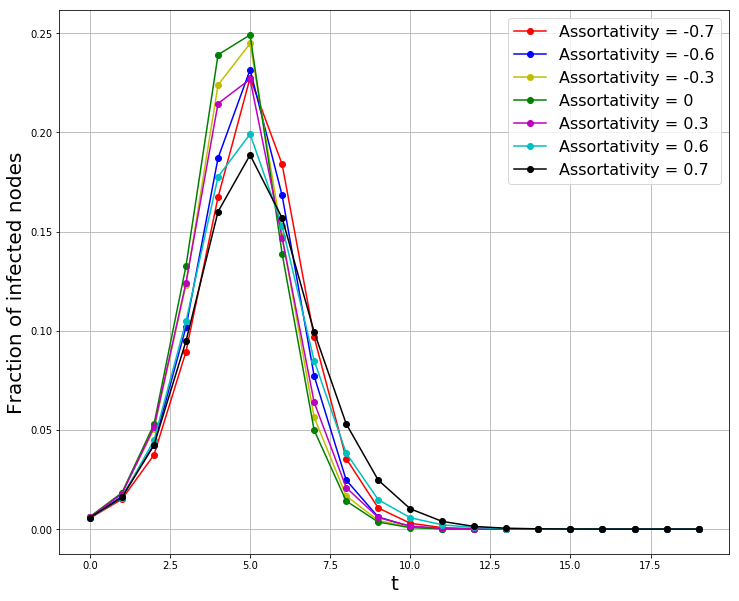

In [281]:
plt.figure(figsize=(12,10))
plt.plot(vt1, av_rho1, 'ro-', label='Assortativity = -0.7')
plt.plot(vt2, av_rho2, 'bo-', label='Assortativity = -0.6')
plt.plot(vt3, av_rho3, 'yo-', label='Assortativity = -0.3')
plt.plot(vt4, av_rho4, 'go-', label='Assortativity = 0')
plt.plot(vt5, av_rho5, 'mo-', label='Assortativity = 0.3')
plt.plot(vt6, av_rho6, 'co-', label='Assortativity = 0.6')
plt.plot(vt7, av_rho7, 'ko-', label='Assortativity = 0.7')
plt.xlabel("t", fontsize=20)
plt.ylabel("Fraction of infected nodes", fontsize=20)
plt.legend(prop={'size': 16})
plt.grid(True)
plt.show(True) 

In [12]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0,100000,100)

In [10]:
x**0.5

array([  0.        ,  10.05037815,  14.21338109,  17.4077656 ,
        20.10075631,  22.47332875,  24.6182982 ,  26.59080117,
        28.42676218,  30.15113446,  31.78208631,  33.33333333,
        34.81553119,  36.23715377,  37.60507165,  38.92494721,
        40.20151261,  41.4387707 ,  42.64014327,  43.80858271,
        44.9466575 ,  46.05661865,  47.14045208,  48.19992037,
        49.23659639,  50.25189076,  51.24707432,  52.22329679,
        53.18160235,  54.12294273,  55.04818826,  55.95813731,
        56.85352436,  57.73502692,  58.60327153,  59.458839  ,
        60.30226892,  61.13406364,  61.95469182,  62.76459145,
        63.56417262,  64.35381994,  65.13389473,  65.90473688,
        66.66666667,  67.41998625,  68.16498109,  68.90192122,
        69.63106238,  70.35264707,  71.06690545,  71.77405626,
        72.47430753,  73.16785738,  73.85489459,  74.53559925,
        75.21014331,  75.87869106,  76.54139964,  77.19841941,
        77.84989442,  78.49596271,  79.13675671,  79.77

In [11]:
np.log(x)**2

C:\Users\Gulherme\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


array([        inf, 21.30026047, 28.17876766, 32.64788539, 36.01818089,
       38.74637262, 41.04939261, 43.04843568, 44.81850014, 46.40940823,
       47.85603452, 49.18379315, 50.41180585, 51.5548395 , 52.62454715,
       53.63029408, 54.57972543, 55.47916705, 56.33391547, 57.14845177,
       57.92660245, 58.67166221, 59.38648904, 60.07357895, 60.73512513,
       61.37306557, 61.98912153, 62.58482899, 63.16156464, 63.72056731,
       64.262956  , 64.78974502, 65.30185674, 65.8001325 , 66.28534194,
       66.75819097, 67.21932874, 67.66935354, 68.10881812, 68.53823418,
       68.95807641, 69.36878598, 69.77077369, 70.1644227 , 70.55009096,
       70.92811346, 71.2988041 , 71.66245747, 72.01935043, 72.36974351,
       72.71388217, 73.05199797, 73.38430958, 73.71102378, 74.03233625,
       74.34843243, 74.65948816, 74.96567038, 75.26713773, 75.56404105,
       75.85652395, 76.14472323, 76.42876932, 76.70878665, 76.98489407,
       77.25720513, 77.52582841, 77.79086782, 78.05242285, 78.31

C:\Users\Gulherme\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


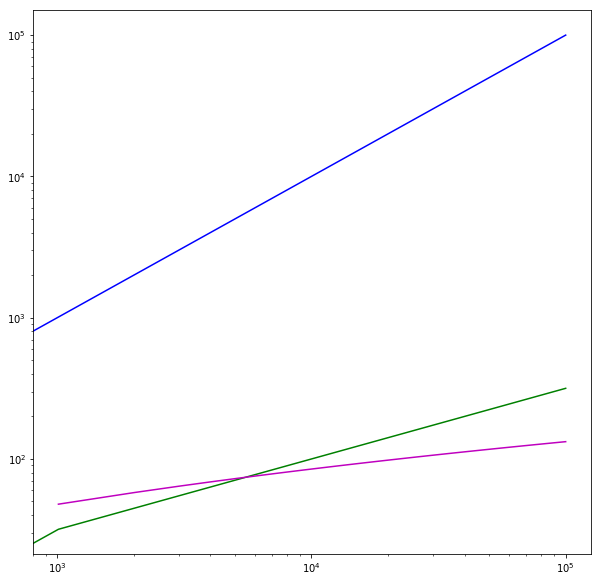

In [14]:
plt.figure(figsize=(10,10))
plt.plot(x, x, 'b')
plt.plot(x, x**(0.5), 'g')
plt.plot(x, (np.log(x))**2,'m')
plt.xscale('log')
plt.yscale('log')

- In this case, of ER networks with the assortativities changed by the Xulvi-Brunet-Sokolov algorithm we note that the peak of infected nodes is greater for the uncorrelated network, followed by the dissortativities networks and the assortatives.


### References

[1] Lecture Notes, Processos dinâmicos em redes complexas, SME5924

[2] Dynamical Processes on complex networks, Alain Barrat, Marc Barthélemy, Alessandro Vespignani

[3] Predicting the epidemic threshold of the susceptible-infected-recovered model, Wei Wang,Quan-Hui Liu, Lin-Feng 
Zhong, Ming Tang, Hui Gao,H. Eugene Stanley, 2016

[4] Construction and properties of assortative random networks, Xulvi-Brunet, I.M Sokolov.